<h1 align="center">Bolometric Corrections</h1>

### "Bolometric correction methods use the bolometric lightcurves of well-observed SNEe (by integrating the SED) to find correlations between an observable quantity such as color and the bolometric correction BC" Lusk et al $\href{https://arxiv.org/abs/1608.08631}{2016}$

Bolometric corrections are defined with the following two expressions

$$
BC_{\lambda} = m_{bol} - m_{\lambda}\\
$$
Where 
$$
BC_{\lambda} = \sum_{k=0}^{n} c_k (m_x - m_y)^k
$$

The bolometric corrections that we will use on KSP ZN-7090 will be the ones from the following two papers , Martinez et al. $\href{https://ui.adsabs.harvard.edu/abs/2022A%26A...660A..40M/abstract}{2022}$ and Layman et al. $\href{https://ui.adsabs.harvard.edu/abs/2014MNRAS.437.3848L/abstract}{2014}$, where they study a wide group of SNe measured in a variety of bands, which allowed them to construct integrate their SED over a range of wavelengths and obtain their bolometric light curves. After this they looked at the correlation beteen the colors of the SNe and the BC. Here they present their correction in seperate phases for the SNe. All the correction presented by both papers are polynomials of degree 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import table

In [2]:
# Read data as a Panda data frame for easier handling
KSP_data = pd.read_csv("KSP-ZN7090_LC_20220309_correct.csv")

In [3]:
KSP_data

,date,date[MJD],date_err,telescope,band,M_0,M_0_err,M_0_lim,M_C,M_C_err,M_C_lim,M_E,M_E_err,M_E_lim,binned,binned_images
0,2020-10-06 19:08:45.000001,59128.797743,0.202431,A/S,V,NaN,NaN,21.839,NaN,NaN,21.839,NaN,NaN,21.772,Y,201006_1239.A/201006_2018.S/201006_2116.S/2010...
1,2020-10-06 19:10:45.000000,59128.799132,0.202431,A/S,I,NaN,NaN,21.944,NaN,NaN,21.944,NaN,NaN,21.902,Y,201006_1241.A/201006_2020.S/201006_2118.S/2010...
2,2020-10-06 21:16:40.000000,59128.886574,0.043056,S,B,23.035,0.506,22.247,23.031,1.240,22.035,22.940,1.240,21.944,Y,201006_2016.S/201006_2114.S/201006_2220.S
3,2020-10-07 21:18:00.000000,59129.887500,0.049653,S,B,25.710,4.268,22.597,26.831,5.908,22.385,26.740,5.908,22.294,Y,201007_2009.S/201007_2113.S/201007_2232.S
4,2020-10-07 21:20:00.000000,59129.888889,0.049653,S,V,NaN,NaN,22.232,NaN,NaN,22.232,NaN,NaN,22.165,Y,201007_2011.S/201007_2115.S/201007_2234.S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2020-12-09 10:42:00.000000,59192.445833,0.000000,A,V,20.713,0.099,21.712,20.713,0.099,21.712,20.646,0.099,21.645,N,NaN
130,2020-12-09 10:44:00.000000,59192.447222,0.000000,A,I,20.305,0.126,21.045,20.305,0.126,21.045,20.263,0.126,21.003,N,NaN
131,2020-12-10 01:16:00.000000,59193.052778,0.000000,C,B,21.277,0.087,22.449,21.180,0.124,22.237,21.089,0.124,22.146,N,NaN
132,2020-12-10 01:18:00.000000,59193.054167,0.000000,C,V,20.757,0.076,22.085,20.757,0.076,22.085,20.690,0.076,22.018,N,NaN


In [4]:
# Store dates in local variable
dates = np.array(KSP_data['date[MJD]'],dtype='float')

# Look at the bands of each individual measurement
bands = KSP_data["band"]
loc_B = np.where(bands=="B")
loc_V = np.where(bands=="V")
loc_I = np.where(bands=='I')

# Index the corrected magnitude arrays on the bands of interest
all_mags = np.array(KSP_data["M_E"])
all_mag_err = np.array(KSP_data["M_E_err"])
B_mags = all_mags[loc_B]
B_mags_err = all_mag_err[loc_B]
V_mags = all_mags[loc_V]
V_mags_err = all_mag_err[loc_V]
I_mags = all_mags[loc_I]
I_mags_err = all_mag_err[loc_I]

# Index dates for respective bands and substract by date of first observation
B_dates = dates[loc_B] - dates[0]
V_dates = dates[loc_V] - dates[0]
I_dates = dates[loc_I] - dates[0]

In [5]:
# Specify Plotting styles
from matplotlib.ticker import MultipleLocator

style = 'default'
tdir = 'in'

major=5
minor=3

font = 'serif'

plt.style.use(style)

plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir

plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

plt.rcParams['font.family'] = font

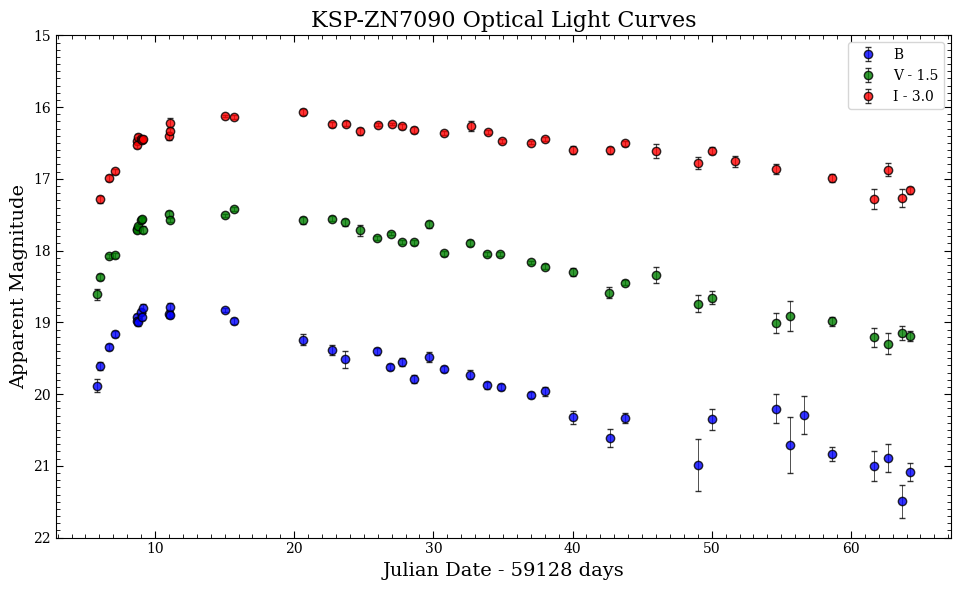

In [6]:
# Plot light curves
gr = 1.618033988749
scale = 6
fig, a0 = plt.subplots(figsize=(gr*scale,scale))
a0.set_title("KSP-ZN7090 Optical Light Curves",fontsize=16)
a0.errorbar(B_dates[3:],B_mags[3:],yerr=B_mags_err[3:],fmt='bo',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='B',mec='k')
a0.errorbar(V_dates,V_mags-1.5,yerr=V_mags_err,fmt='go',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='V - 1.5',mec='k')
a0.errorbar(I_dates[3:],I_mags[3:]-3,yerr=I_mags_err[3:],fmt='ro',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='I - 3.0',mec='k')
a0.set_ylabel("Apparent Magnitude",fontsize=14)
a0.set_xlabel(f"Julian Date - {int(dates[0])} days",fontsize=14)
a0.invert_yaxis()
a0.set_ylim([28,18])
a0.tick_params(axis='y', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(1))
a0.set_ylim([22,15])
a0.legend(fancybox=True)
a0.yaxis.set_ticks_position('both')
a0.xaxis.set_ticks_position('both')

plt.tight_layout()
plt.savefig("Corrected LCs.png")
plt.show()

<h2 align="center"> Characterizing V-Band Light Curve using Anderson et al. $\href{https://iopscience.iop.org/article/10.1088/0004-637X/786/1/67}{2014}$ <h2>

It is very important for us to confidently classify our SN because this will help us apply the correct bolometric correction on the respective phases of our light curve. In Anderson's paper they chracterize the light curves of varies Type II SNe by sub-dividing the light curves of a big sample of SNe and performing different types of fitting on the LC. Most if not all the LC studied in Anderson's paper exhibit a plateau phase where the characterize the different phases of the light curve with different slopes. Here we measure the decline rate in the V-band LC post peak and we will be able to classify our SNe.

Light curve post-peak decline rate: 3.55935776260674 mags/100d


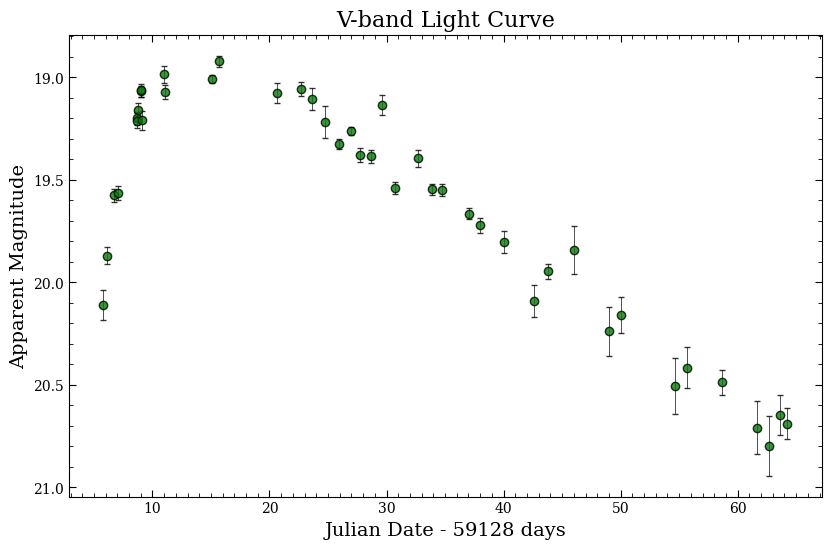

In [59]:
from scipy.optimize import curve_fit

# Define model function
def linear(x,a,b):
    return(x*a + b)

# Locate max magnitude
i_max = np.where(V_mags[3:]==np.max(V_mags[3:]))[0][0]

# Look at the decline rate of v-band light curve
popt, pcov = curve_fit(linear,V_dates[i_max:],V_mags[i_max:],sigma=V_mags_err[i_max:],absolute_sigma=True)
print("Light curve post-peak decline rate:",popt[0]*100,"mags/100d")

fig, a0 = plt.subplots(figsize=(gr*6,6))
a0.errorbar(V_dates,V_mags,yerr=V_mags_err,fmt='go',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='V - 1.5',mec='k')
a0.set_ylabel("Apparent Magnitude",fontsize=14)
a0.set_xlabel(f"Julian Date - {int(dates[0])} days",fontsize=14)
a0.set_title("V-band Light Curve",fontsize=16)
a0.invert_yaxis()
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(1))
a0.yaxis.set_ticks_position('both')
a0.xaxis.set_ticks_position('both')

From the linear fitting on the post peak decay we see that the decay rate is $> 0.01 \, \mathrm{mag/day}$ which indeed discards the possibility of KSP-ZN7090 being Type II-P SNe. This means the ZN-7090 could be a a Type II-L SNe or a Type IIb SNe, note that these two forms of classifications are not mutually exclusive.

<h2 align="center"> About SNe Type II-L and Type IIb <h2>

Type II-L SNe is a classification based solely on the morphology of the light curve of the SNe, the specific classification used in literature is that is linear decline rate post peak magnitude in the V-band must be greater than a hundreth of a magnitude per day. Type IIb is a subclassification of the SNe based on its spectroscopic data, the 'b' stands for the hydrogen deficinecy, so Type IIb SNe initially show strong Hydrogen emission lines, but subsequently evolve as a SN Ib which leads to the linear decline post peak magnitude.

### Interpolation
In order to apply bolometric corrections we need to ensure magnitudes are taken in the same epoch, which means we need to interpolate either the B-band light curve or the V-band light curve in order to match the epochs. For the interpolation we will be using a linear and a cubic spline interpolation from the scipy.interpolate package. We then later plan on comparing the bolometric light curves generated by each interpolation method.

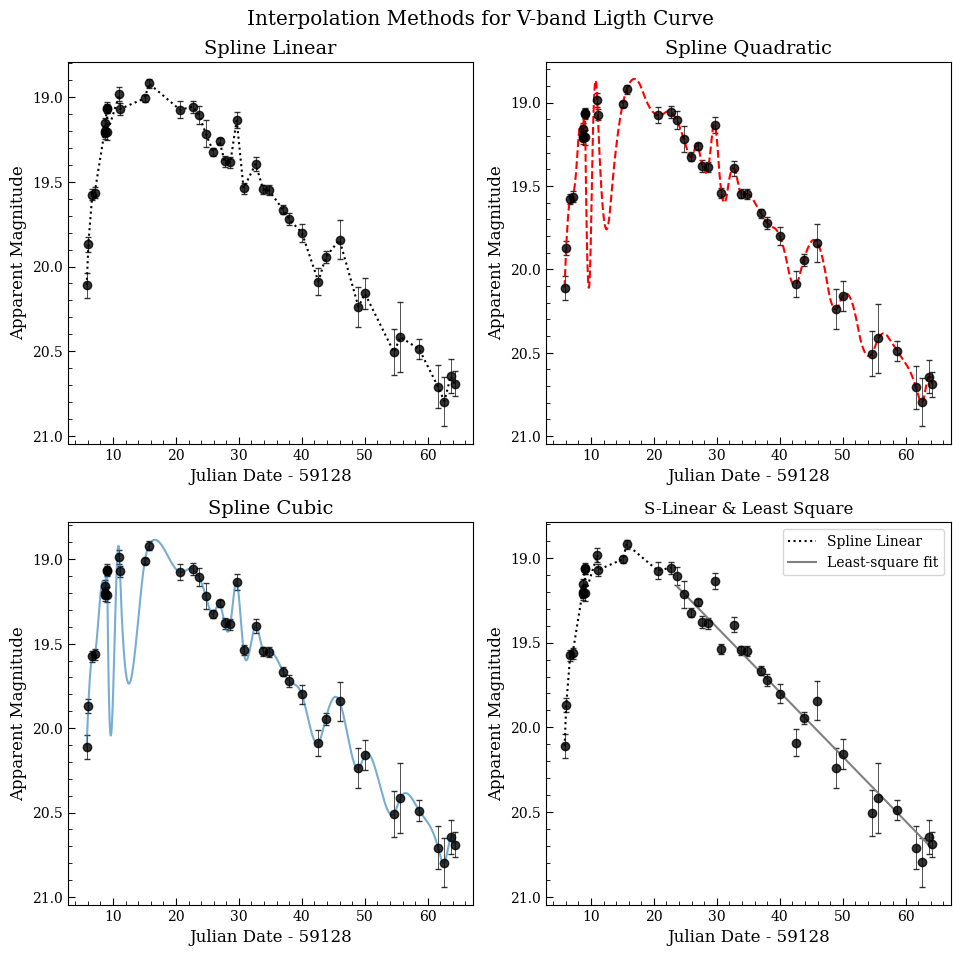

In [8]:
from scipy.interpolate import CubicSpline,interp1d,PPoly,barycentric_interpolate
# Generate domains for interpolation 
N = 1000
dummy_domain = np.linspace(V_dates[3],V_dates[-1],N)

# Try different methods of interpolation
CS = CubicSpline(V_dates[3:],V_mags[3:])
LI = interp1d(V_dates[3:],V_mags[3:],fill_value='extrapolate')
QU = interp1d(V_dates[3:],V_mags[3:],kind='quadratic')

# We will follow linear interpolation for the first 12 points and then we will perform a least-square fitting
linear_domain = np.linspace(V_dates[19],V_dates[-1],N)
popt, pcov = curve_fit(linear,V_dates[19:],V_mags[19:],sigma=V_mags_err[19:],absolute_sigma=True)


fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(scale*gr,scale*gr),
                                 ncols=2, nrows=2)
fig.suptitle("Interpolation Methods for V-band Ligth Curve", fontsize='x-large')

a0.errorbar(V_dates,V_mags,yerr=V_mags_err,fmt='ko',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a0.plot(dummy_domain,LI(dummy_domain),label="Linear",ls=':',c='k')
a0.invert_yaxis()
a0.set_title("Spline Linear",fontsize=14)
a0.set_xlabel(f"Julian Date - {int(dates[0])}",fontsize=12)
a0.set_ylabel("Apparent Magnitude",fontsize=12)
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(V_dates,V_mags,yerr=V_mags_err,fmt='ko',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a1.plot(dummy_domain,QU(dummy_domain),label="Quadratic",c='red',ls='--')
a1.invert_yaxis()
a1.set_title("Spline Quadratic",fontsize=14)
a1.set_xlabel(f"Julian Date - {int(dates[0])}",fontsize=12)
a1.set_ylabel("Apparent Magnitude",fontsize=12)
a1.yaxis.set_minor_locator(MultipleLocator(.1))
a1.xaxis.set_minor_locator(MultipleLocator(2))

a2.errorbar(V_dates,V_mags,yerr=V_mags_err,fmt='ko',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a2.plot(dummy_domain,CS(dummy_domain),label="Cubic Spline",alpha=0.6)
a2.invert_yaxis()
a2.set_title("Spline Cubic",fontsize=14)
a2.set_xlabel(f"Julian Date - {int(dates[0])}",fontsize=12)
a2.set_ylabel("Apparent Magnitude",fontsize=12)
a2.yaxis.set_minor_locator(MultipleLocator(.1))
a2.xaxis.set_minor_locator(MultipleLocator(2))

a3.errorbar(V_dates,V_mags,yerr=V_mags_err,fmt='ko',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a3.plot(V_dates[3:19],LI(V_dates[3:19]),label='Spline Linear',ls=':',c='k')
a3.plot(linear_domain,linear(linear_domain,*popt),c='gray',label='Least-square fit')
a3.legend()
a3.invert_yaxis()
a3.set_title("S-Linear & Least Square")
a3.set_xlabel(f"Julian Date - {int(dates[0])}",fontsize=12)
a3.set_ylabel("Apparent Magnitude",fontsize=12)
a3.yaxis.set_minor_locator(MultipleLocator(.1))
a3.xaxis.set_minor_locator(MultipleLocator(2))

plt.tight_layout()
plt.savefig("Interpolated LC.png")
plt.show()

Because we suspect ZN-7090 is a Type II-L SNe then we expect the light curve post peak would follow a linear decay, therefore, we see the best interpolation method that will highlight this linear decay is a linear interpolation method as this method does not add any sort of non-existing curvature past the peak. Furthermore, the linear interpolation capture the SBO phase pretty well and capture the curvature of the peak magnitude better than any of the ther methods of interpolation.

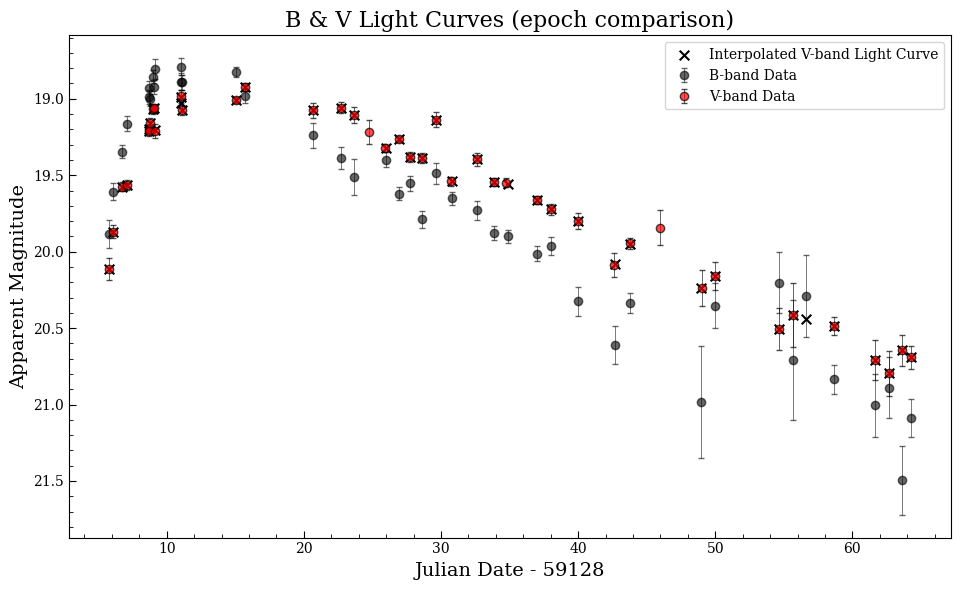

In [9]:
# Ignore the first 3 data poing of non detection from the B-band
B_dates_R = B_dates[3:]
B_mags_R = B_mags[3:]
B_mags_err_R = B_mags_err[3:]

# Compute V-band in the dates of B-band observations
V_mags_C = LI(B_dates_R)
V_mags_err_R = V_mags_err[3:]
# Select uncertainties only in the dates that work with v-band


# Plot both light curves on the same plot
# Remove 3 non-detection points of B-band
fig, a0 = plt.subplots(figsize=(gr*scale,scale),ncols=1)
a0.scatter(B_dates_R,V_mags_C,label="Interpolated V-band Light Curve",marker='x',s=48,c='k')
a0.errorbar(B_dates_R,B_mags_R,yerr=B_mags_err[3:],fmt='ko',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.6,label='B-band Data',mec='k')
a0.errorbar(V_dates,V_mags,yerr=V_mags_err,fmt='ro',ecolor='k',elinewidth=0.6,alpha=0.7,capsize=2,label='V-band Data',mec='k')
a0.set_title("B & V Light Curves (epoch comparison)",fontsize=16)
a0.set_xlabel(f"Julian Date - {int(dates[0])}",fontsize=14)
a0.set_ylabel("Apparent Magnitude",fontsize=14)
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))
a0.legend()
a0.invert_yaxis()
plt.tight_layout()
plt.show()

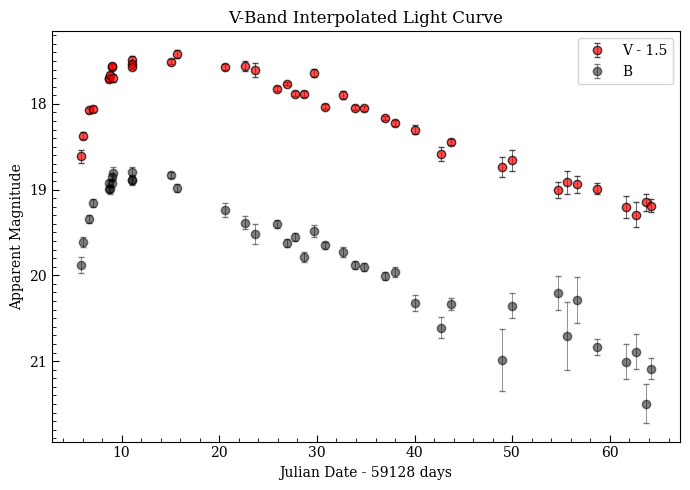

In [10]:
# Make the error of the 1 interpolated point the avergae of its neighbours
V_mags_err[-6] = (V_mags_err[-7] + V_mags_err[-5])/2
fig, a0 = plt.subplots(figsize=(7,5),ncols=1)
a0.errorbar(B_dates_R,V_mags_C-1.5,yerr=V_mags_err_R,fmt='ro',ecolor='k',elinewidth=0.6,alpha=0.7,capsize=2,label='V - 1.5',mec='k')
a0.errorbar(B_dates_R,B_mags_R,yerr=B_mags_err_R,fmt='ko',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.5,label='B',mec='k')
a0.invert_yaxis()
a0.legend()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days")
a0.set_ylabel("Apparent Magnitude")
a0.set_title("V-Band Interpolated Light Curve")
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))
plt.tight_layout()
plt.show()

<h2 align="center"> Applying Martinez et al. $\href{https://ui.adsabs.harvard.edu/abs/2022A%26A...660A..40M/abstract}{2022}$ bolometric corrections <h2>

We will be using bolometric correction specific to the cooling phase because KSP-ZN7090 does not exhibit a plateau phase nor has entered a radiactive tail phase yet. The bolometric correction presented in this paper consists of a fourth order polynomial with a standard deviation of $\sigma = 0.12 $ which is explicitly written as follows.

$$
BC_{B,cool} = -0.740 + 4.472(B-V) - 9.637(B-V)^2 + 9.075(B-V)^3 - 3.290(B-V)^4
$$

Recall bolometric correction are defined as follows.

$$
BC_{B} = m_{bol} - m_{B}
$$

$$
m_{bol} = BC_{B} + m_{B}
$$

In [11]:
# Define needed parameters
sigma = 0.12
c0, c1, c2, c3, c4 = -0.740, 4.472, -9.637, 9.075, -3.290
    
# Define BC with coefficients
BC  = lambda x: c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4

In [12]:
# Import Bolometric Correction given Martinez et al. coefficients
from Bolometric_Corrections import Martinez_cooling_Asymmetric1

mbol, mbol_errU,mbol_errL, color, color_err, \
correction, correction_Uerr,correction_Lerr = Martinez_cooling_Asymmetric1(B_mags_R,V_mags_C,B_mags_err_R,V_mags_err_R)

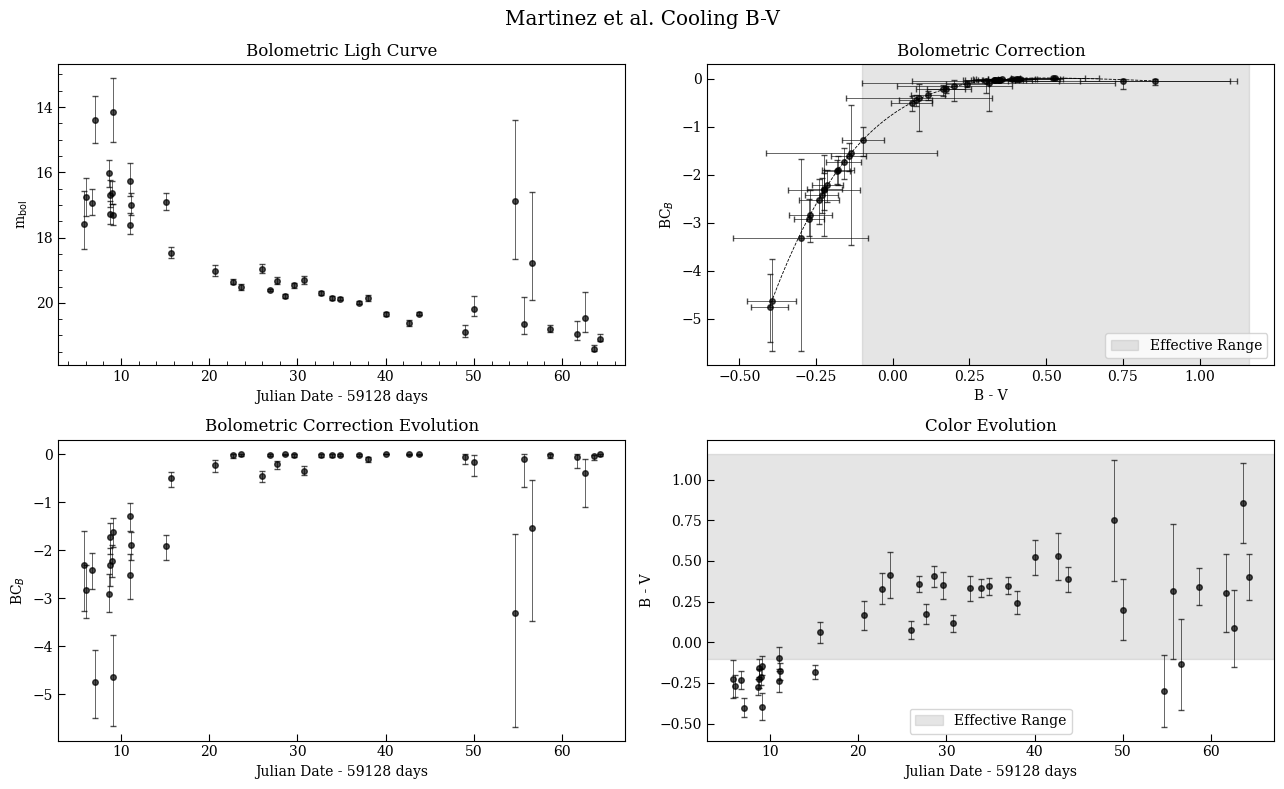

In [13]:
corr_aerr = [correction_Lerr,correction_Uerr]
ambol_err = [mbol_errL,mbol_errU]

color_domain = np.arange(np.min(color),np.max(color),0.01)
# Now we can look at distinct plots for this correction
fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(gr*8,8),
                                nrows=2,ncols=2)
fig.suptitle("Martinez et al. Cooling B-V", fontsize='x-large')
a0.set_title("Bolometric Ligh Curve")
a0.errorbar(B_dates_R,mbol,yerr=ambol_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a0.invert_yaxis()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days")
a0.set_ylabel(r"m$_{\mathrm{bol}}$")
a0.tick_params(axis='both', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.5))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(color,correction,xerr=color_err,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a1.plot(color_domain,BC(color_domain),c='k',ls='--',lw=0.6)
a1.axvspan(-0.1, 1.16 , alpha=0.2, color='gray',label="Effective Range")
a1.set_xlabel("B - V")
a1.set_ylabel(r"BC$_B$")
a1.set_title("Bolometric Correction")
a1.legend(fancybox=True)

a2.errorbar(B_dates_R,correction,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a2.set_xlabel(f"Julian Date - {int(dates[0])} days")
a2.set_ylabel(r"BC$_B$")
a2.set_title("Bolometric Correction Evolution")

a3.errorbar(B_dates_R,color,yerr=color_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a3.axhspan(-0.1, 1.16 , alpha=0.2, color='gray',label="Effective Range")
a3.set_xlabel(f"Julian Date - {int(dates[0])} days")
a3.set_ylabel("B - V")
a3.set_title("Color Evolution")
a3.legend(fancybox=True)

plt.tight_layout()
plt.savefig("Martinez Correction.png")
plt.show()

<h2 align="center"> Investigating Uncertainties in Bolometric Light Curve <h2>

We notice there are 3 data point in our light curve that exhibit very large error bars, this seems highly suspicious so we will investigate further this occurance by looking at the individual distribution of the data points

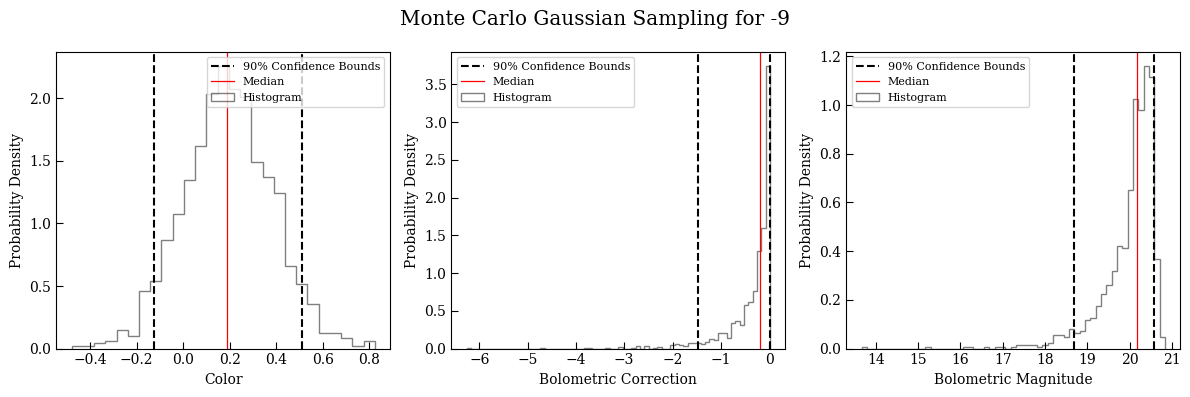

Bolometric Magnitude Median: 20.172395435837508
Upper 90%: 20.581682828591468
Lower 90%: 18.676641833265094
Upper Quantile: 20.13549377927586
Lower Quantile: 17.066921695521543


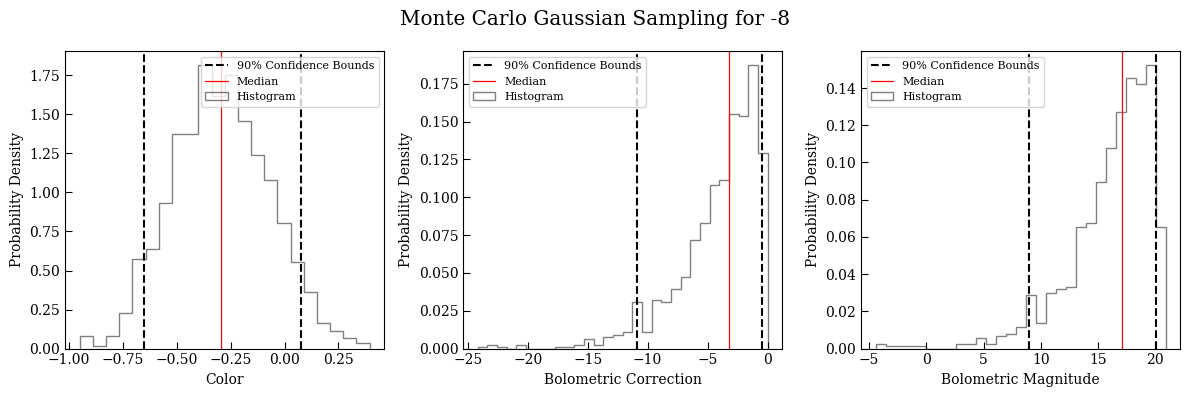

Bolometric Magnitude Median: 17.061030448958974
Upper 90%: 20.08334030439544
Lower 90%: 8.950634855804061
Upper Quantile: 20.13549377927586
Lower Quantile: 17.066921695521543


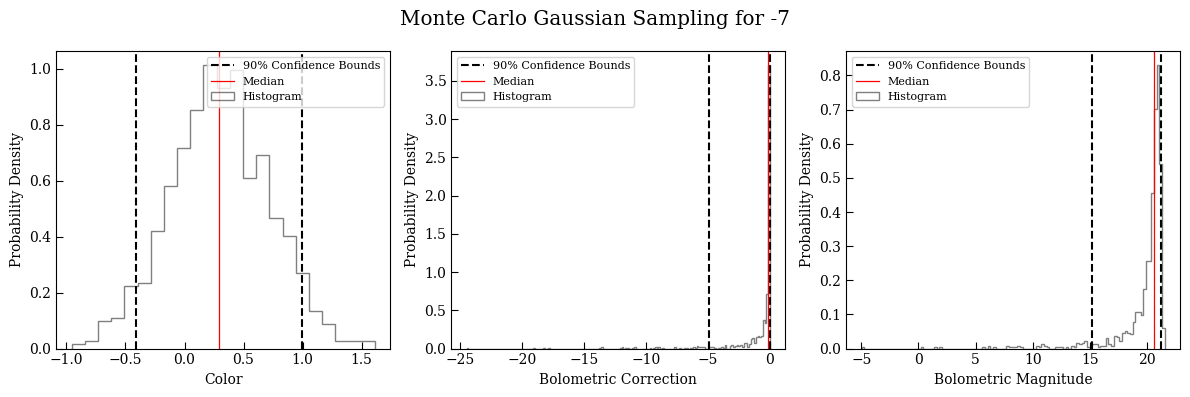

Bolometric Magnitude Median: 20.624129048464873
Upper 90%: 21.216565837614954
Lower 90%: 15.14367799353846
Upper Quantile: 20.13549377927586
Lower Quantile: 17.066921695521543


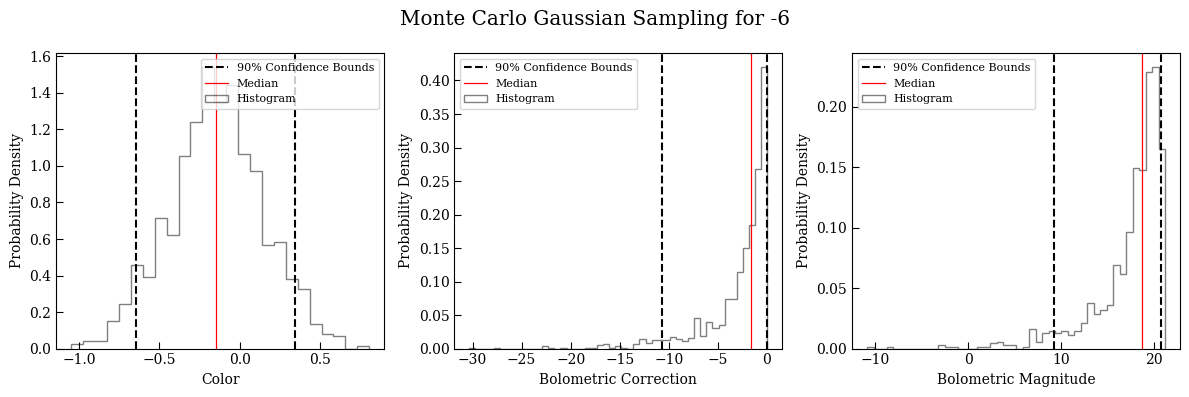

Bolometric Magnitude Median: 18.649954471410638
Upper 90%: 20.699235999799498
Lower 90%: 9.203352161170809
Upper Quantile: 20.13549377927586
Lower Quantile: 17.066921695521543


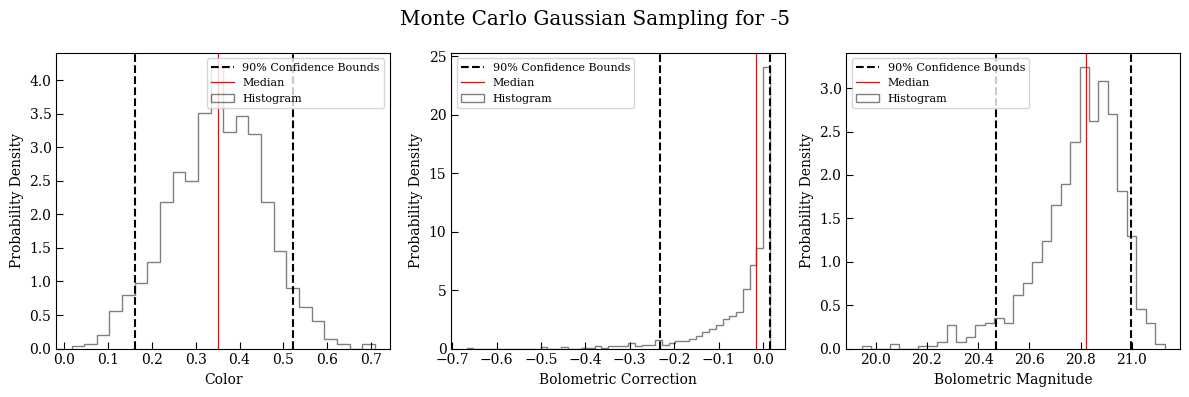

Bolometric Magnitude Median: 20.82057962622609
Upper 90%: 20.99593852976541
Lower 90%: 20.471014138490514
Upper Quantile: 20.13549377927586
Lower Quantile: 17.066921695521543


In [14]:
# Define needed parameters
sigma = 0.12
c0, c1, c2, c3, c4 = -0.740, 4.472, -9.637, 9.075, -3.290
    
# Define BC with coefficients
BC  = lambda x: c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4

for i in range(-9,-4):
    fig = plt.figure(figsize=(12,4))
    fig.suptitle(f"Monte Carlo Gaussian Sampling for {i}", fontsize='x-large')
    a1 = plt.subplot(1,3,1)
    a2 = plt.subplot(1,3,2)
    a3 = plt.subplot(1,3,3)

    sB_mag = np.random.normal(loc=B_mags_R[i],scale=B_mags_err_R[i],size=1000)
    sV_mag = np.random.normal(loc=V_mags_C[i],scale=V_mags_err_R[i],size=1000)

    s_color = sB_mag - sV_mag
    s_BC = BC(s_color)
    s_mbol = BC(s_color) + sB_mag
    
    # Calculate statistical properties for each distribution
    color_lq = np.percentile(s_color, 5)
    color_uq = np.percentile(s_color, 95)
    color_med = np.median(s_color)
    
    BC_lq = np.percentile(s_BC, 5)
    BC_uq = np.percentile(s_BC, 95)
    BC_med = np.median(s_BC)
    
    mbol_lq = np.percentile(s_mbol, 5)
    mbol_uq = np.percentile(s_mbol, 95)
    mbol_med = np.median(s_mbol)
    
    
    a1.hist(s_color, bins = 'fd',density=True, color = 'k', histtype = 'step', label = 'Histogram', alpha = 0.5)
    a1.axvline(x = color_lq, color = 'k', label = '90% Confidence Bounds', linestyle = '--')
    a1.axvline(x = color_uq, color = 'k', linestyle = '--')
    a1.axvline(x = color_med, color = 'r', label = 'Median', linestyle = '-',linewidth=0.9)
    a1.set_xlabel("Color")
    a1.set_ylabel("Probability Density")
    a1.legend(prop={'size':8})
    
    a2.hist(s_BC,bins = 'fd',density=True, color = 'k', histtype = 'step', label = 'Histogram', alpha = 0.5)
    a2.axvline(x = BC_lq, color = 'k', label = '90% Confidence Bounds', linestyle = '--')
    a2.axvline(x = BC_uq, color = 'k', linestyle = '--')
    a2.axvline(x = BC_med, color = 'r', label = 'Median', linestyle = '-',linewidth=0.9)
    a2.set_xlabel("Bolometric Correction")
    a2.set_ylabel("Probability Density")
    a2.legend(prop={'size':8})
    
    a3.hist(s_mbol,bins = 'fd',density=True, color = 'k', histtype = 'step', label = 'Histogram', alpha = 0.5)
    a3.axvline(x = mbol_lq, color = 'k', label = '90% Confidence Bounds', linestyle = '--')
    a3.axvline(x = mbol_uq, color = 'k', linestyle = '--')
    a3.axvline(x = mbol_med, color = 'r', label = 'Median', linestyle = '-',linewidth=0.9)
    a3.set_xlabel("Bolometric Magnitude")
    a3.set_ylabel("Probability Density")
    a3.legend(prop={'size':8})
    
    plt.tight_layout()
    plt.show()
    
    print('Bolometric Magnitude Median:',mbol_med)
    print('Upper 90%:',mbol_uq)
    print('Lower 90%:',mbol_lq)
    print('Upper Quantile:',np.percentile(mbol,75))
    print('Lower Quantile:',np.percentile(mbol,25))

We see that the distribution of the bolometric magnitude is larger asymetric which justifies us to use the IQR as a measuremt of the spread of the data instead of the standard deviation

<h2 align="center"> Probing Color Sensitivity <h2>

The histograms from the monte carlos Gaussian sampling simulations indicate that the correction is very sensitive to color, therefore we need to investigate how exactly the bolometric correction is sensitive to color, we can do this by sligthly peturbing the color by a fixed percentage and measure the variation in BC with respect to the variation in color.

$$
\frac{\Delta BC_B}{\Delta Color}
$$

If we fix $\Delta Color$ and compute this quantity for a range of colors we will be able to probe the variation in the correction as a function of color.

In [15]:
# Define array of coeff
Martinez_coeff = [c0,c1,c2,c3,c4]

# Set up color domain
color_domain = np.arange(-0.5,1.5,0.01)

# Set up percentages array
percentages = np.linspace(0.1,0.5,10)

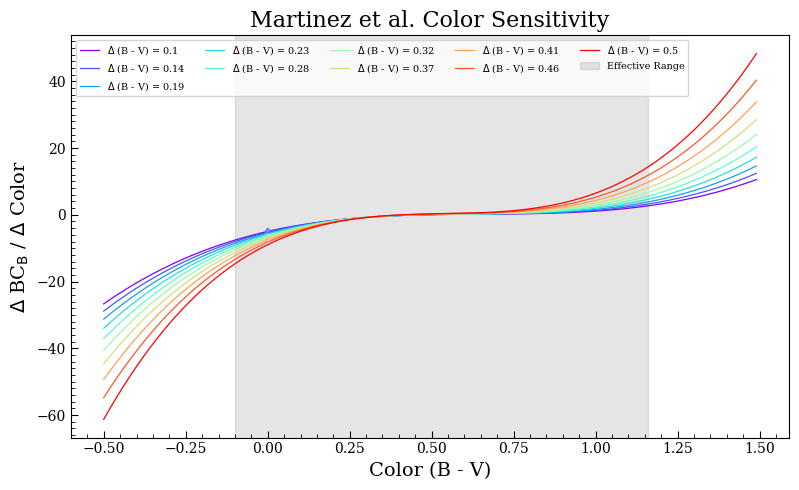

In [16]:
from Helpers import Probe_sensitivity
import matplotlib
fig, a0 = plt.subplots(figsize=(gr*5,5),ncols=1)
n=10

color = matplotlib.cm.rainbow(np.linspace(0, 1, n))
for i, c in zip(range(n), color):
    sens = Probe_sensitivity(color_domain,percentages[i],Martinez_coeff)
    a0.plot(color_domain,sens,c=c,linewidth=0.9,label='$\Delta$ (B - V) = {}'.format(round(percentages[i],2)))
    a0.set_xlabel("Color (B - V)",fontsize=14)
    a0.set_ylabel(r"$\Delta$ BC$_\mathrm{B}$ / $\Delta$ Color",fontsize=14)
    a0.set_title("Martinez et al. Color Sensitivity",fontsize=16)

a0.axvspan(-0.1, 1.16 , alpha=0.2, color='gray',label="Effective Range")
a0.legend(loc='upper left',ncol=5,fancybox=True,prop={'size':7})
a0.yaxis.set_minor_locator(MultipleLocator(2))
a0.xaxis.set_minor_locator(MultipleLocator(0.05))
#a0.axhline(y=0)
plt.tight_layout()
plt.show()

In [17]:
from Bolometric_Corrections import Martinez_cooling_Asymmetric2

In [18]:
thresh = 0.20
data_r = [-0.1,1.16]

mbol, mbol_errU,mbol_errL, color, color_err, \
correction, correction_Uerr,correction_Lerr,rem = Martinez_cooling_Asymmetric2(B_mags_R,V_mags_C,B_mags_err_R,V_mags_err_R,thresh,data_r)

In [19]:
# Remove dates with colors that did not work
Mdates = np.delete(B_dates_R,rem)

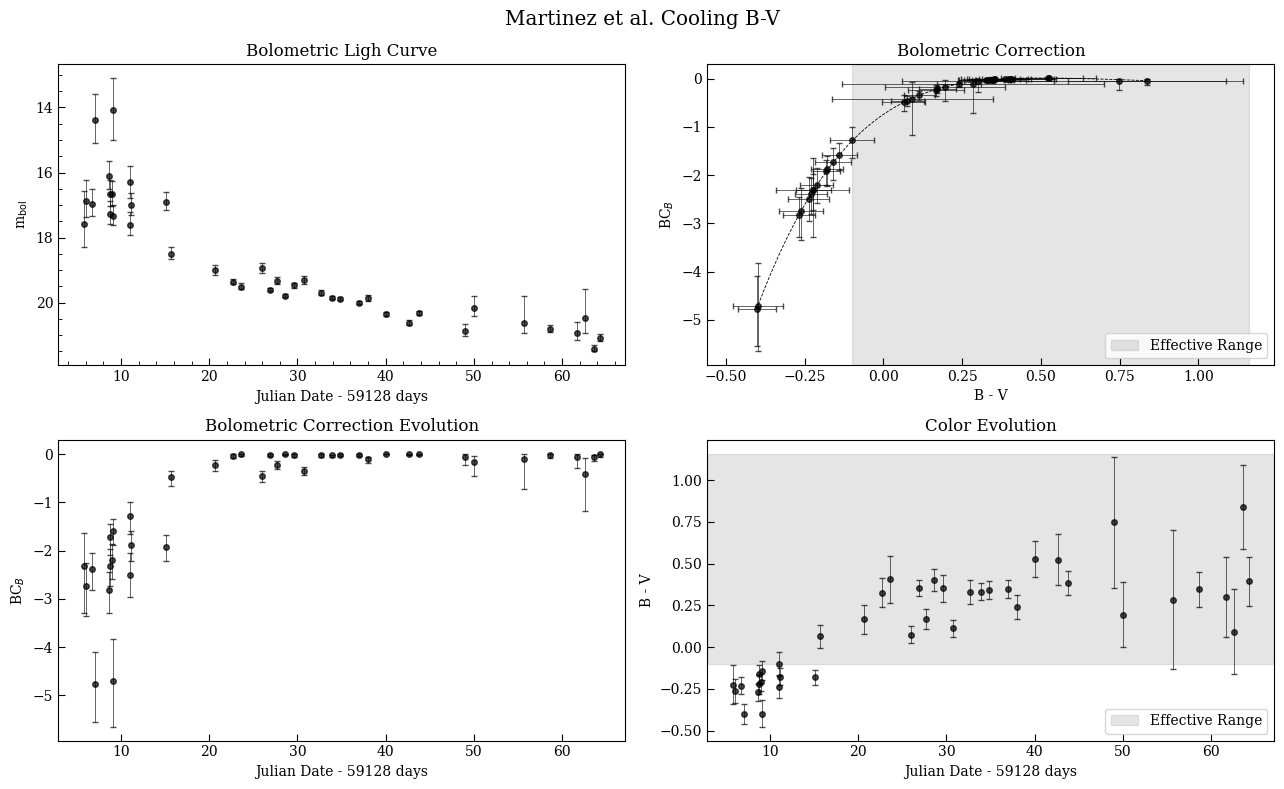

In [20]:
# Set up asymetric errorbars for correction
corr_aerr = [correction_Lerr,correction_Uerr]
ambol_err = [mbol_errL,mbol_errU]

color_domain = np.arange(np.min(color),np.max(color),0.01)
# Now we can look at distinct plots for this correction
fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(gr*8,8),
                                nrows=2,ncols=2)
fig.suptitle("Martinez et al. Cooling B-V", fontsize='x-large')
a0.set_title("Bolometric Ligh Curve")
a0.errorbar(Mdates,mbol,yerr=ambol_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a0.invert_yaxis()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days")
a0.set_ylabel(r"m$_{\mathrm{bol}}$")
a0.tick_params(axis='both', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.5))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(color,correction,xerr=color_err,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a1.plot(color_domain,BC(color_domain),c='k',ls='--',lw=0.6)
a1.axvspan(-0.1, 1.16 , alpha=0.2, color='gray',label="Effective Range")
a1.set_xlabel("B - V")
a1.set_ylabel(r"BC$_B$")
a1.set_title("Bolometric Correction")
a1.legend(fancybox=True)

a2.errorbar(Mdates,correction,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a2.set_xlabel(f"Julian Date - {int(dates[0])} days")
a2.set_ylabel(r"BC$_B$")
a2.set_title("Bolometric Correction Evolution")

a3.errorbar(Mdates,color,yerr=color_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a3.axhspan(-0.1, 1.16 , alpha=0.2, color='gray',label="Effective Range")
a3.set_xlabel(f"Julian Date - {int(dates[0])} days")
a3.set_ylabel("B - V")
a3.set_title("Color Evolution")
a3.legend(fancybox=True)

plt.tight_layout()
plt.show()

We notice that in our color evolution plot our two data points are outside the effective range provided by Martinez, we must see how this affecting the bolometric uncertaitniy propagation by seeing how such quantity is sensitive to color. We can better understand the behaviour of the correction by looking at the first derivative of our bolometric correction function.

From this plot we clearly see that higher color variation leads to a large bolometric correction variation when the color lies outside the effective range, therefore it is appropriate to discard points with high color variation and are outside the effective range.

<h2 align="center"> Applying Layman et al. $\href{https://ui.adsabs.harvard.edu/abs/2014MNRAS.437.3848L/abstract}{2014}$ bolometric corrections <h2>

This paper provides several options for applying the method of bolometric corrections, we are provided with pseudo-bolometric correction and bolometric corrections for a general type II SNe sample. Furthermore, we also provide with a more general bolometric correction for their entire SNe sample which we also intend in using the pseudo-bolometric correction provided by this paper for type-II SNe.

However, what highlights this paper is that we have two bolometric correction one of the SBO cooling phase and another for the recombination-powered phase/post peak, which we expect to give us better bolometric light curves. 

In [21]:
# Because there are multiple correction we will store them in pandas data frames
Layman_df = pd.DataFrame()

Its best to use pandas data frames to hold this information as I will be able to pipeline the bolometric correction procedure much easier later on.

In [22]:
Layman_df["Phase"] = ['Cooling','Cooling','Cooling','Recomb','Recomb','Recomb','Recomb','Recomb','Recomb']
Layman_df["Color"] = ['B - V','B - I','V - I','B - V','B - I','V - I','B - V','B - I','V - I']
Layman_df["Type"] = ["BC","BC","BC","BC","BC","BC","pBC","pBC","pBC"]
Layman_df["Range"] = [[-0.2, 0.5],[-0.2, 0.8],[0, 0.4],[0, 1.6],[0, 2.8],[0, 1.2],[0, 1.6],[0, 2.8],[0, 1.2]]
Layman_df["C0"] = [-0.393,-0.473,-0.610,-0.138,0.004,0.057,0.058,0.121,0.065]
Layman_df["C1"] = [0.786,0.830,2.244,-0.013,-0.297,0.708,-0.331,-0.387,0.744]
Layman_df["C2"] = [-2.124,-1.064,-2.107,-0.649,-0.149,0.912,-0.520,-0.131,-0.953]
Layman_df["RMS"] = [0.089,0.072,0.146,0.094,0.026,0.043,0.092,0.028,0.053]
Layman_df

,Phase,Color,Type,Range,C0,C1,C2,RMS
0,Cooling,B - V,BC,"[-0.2, 0.5]",-0.393,0.786,-2.124,0.089
1,Cooling,B - I,BC,"[-0.2, 0.8]",-0.473,0.830,-1.064,0.072
2,Cooling,V - I,BC,"[0, 0.4]",-0.610,2.244,-2.107,0.146
3,Recomb,B - V,BC,"[0, 1.6]",-0.138,-0.013,-0.649,0.094
4,Recomb,B - I,BC,"[0, 2.8]",0.004,-0.297,-0.149,0.026
5,Recomb,V - I,BC,"[0, 1.2]",0.057,0.708,0.912,0.043
6,Recomb,B - V,pBC,"[0, 1.6]",0.058,-0.331,-0.520,0.092
7,Recomb,B - I,pBC,"[0, 2.8]",0.121,-0.387,-0.131,0.028
8,Recomb,V - I,pBC,"[0, 1.2]",0.065,0.744,-0.953,0.053


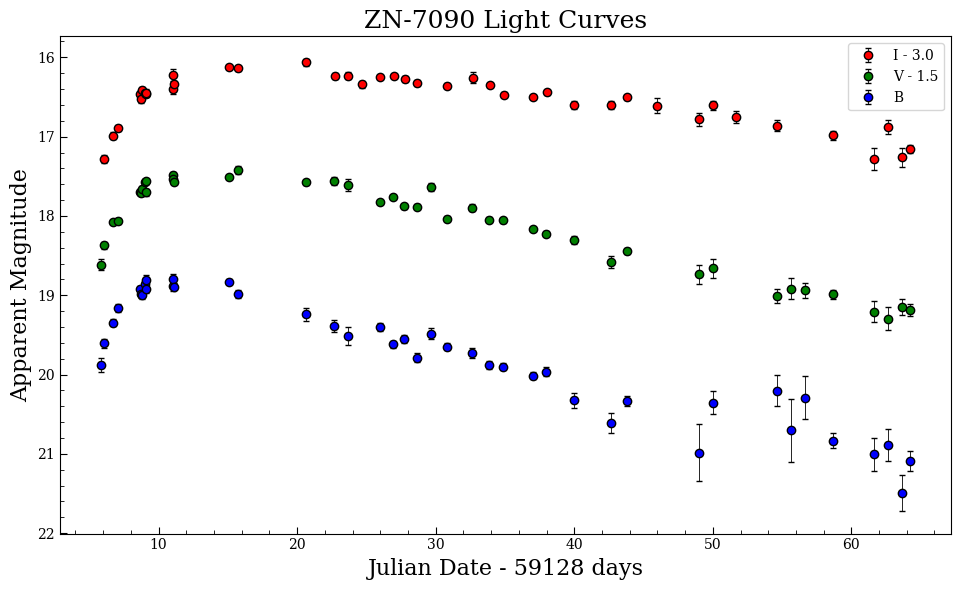

In [23]:
# Reduce data to detections only
I_mags_R = I_mags[3:]
I_dates_R = I_dates[3:]
I_mags_err_R = I_mags_err[3:]

V_mags_err_R = V_mags_err[3:]

# Ensure all magnitudes in all bands are take in the same bands
fig, a0 = plt.subplots(figsize=(gr*scale,scale),ncols=1)
a0.errorbar(I_dates_R,I_mags_R - 3,yerr=I_mags_err_R,fmt='ro',elinewidth=0.6,capsize=2,ecolor='k',label="I - 3.0",mec='k')
a0.errorbar(B_dates_R,V_mags_C-1.5,yerr=V_mags_err_R,fmt='go',elinewidth=0.6,capsize=2,ecolor='k',label="V - 1.5",mec='k')
a0.errorbar(B_dates_R,B_mags_R,yerr=B_mags_err_R,fmt='bo',elinewidth=0.6,capsize=2,ecolor='k',label="B",mec='k')
a0.legend()
a0.yaxis.set_minor_locator(MultipleLocator(0.2))
a0.xaxis.set_minor_locator(MultipleLocator(2))
a0.set_xlabel(f"Julian Date - {int(dates[0])} days",fontsize=16)
a0.set_ylabel("Apparent Magnitude",fontsize=16)
a0.set_title("ZN-7090 Light Curves",fontsize=18)
a0.invert_yaxis()
plt.tight_layout()
plt.show()

From our previous work on the interpolation on the V-band light curve we know that it's magnitudes are in the same epoch's as the b-band light curve. However, from inspection we notice that there are some missing data points between the I-band light curve and the B & V bands light curves. We will fill in these gaps through a linear interpolation method.

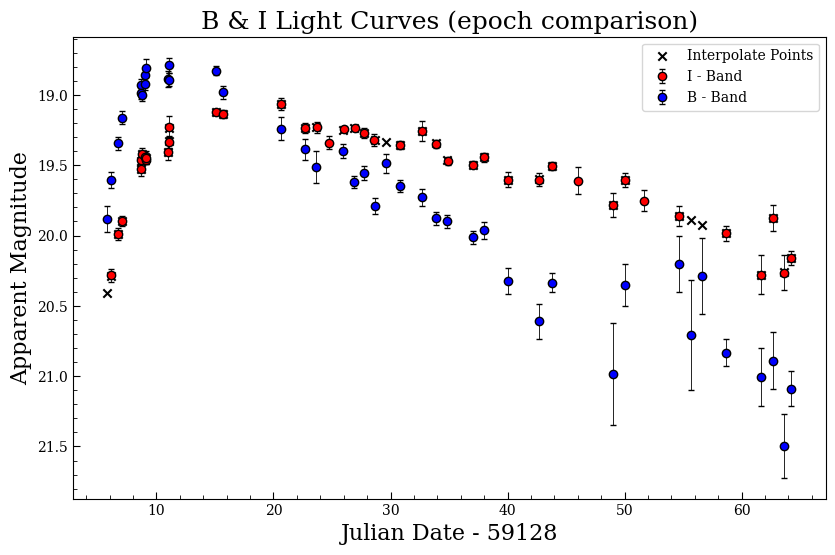

In [24]:
# Perform linear interpolation
I_LI = interp1d(I_dates_R,I_mags_R,fill_value='extrapolate')
I_mags_C = I_LI(B_dates_R)

fig, a0 = plt.subplots(figsize=(scale*gr,scale))
a0.errorbar(I_dates_R,I_mags_R,yerr=I_mags_err_R,fmt='ro',elinewidth=0.6,capsize=2,ecolor='k',mec='k',label="I - Band")
a0.errorbar(B_dates_R,B_mags_R,yerr=B_mags_err_R,fmt='bo',elinewidth=0.6,capsize=2,ecolor='k',mec='k',label='B - Band')
a0.scatter(B_dates_R,I_mags_C,marker='x',c='k',label='Interpolate Points')
a0.set_xlabel(f"Julian Date - {int(dates[0])}",fontsize=16)
a0.set_ylabel(f"Apparent Magnitude",fontsize=16)
a0.set_title("B & I Light Curves (epoch comparison)",fontsize=18)
a0.legend()
a0.yaxis.set_minor_locator(MultipleLocator(0.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))
a0.invert_yaxis()
plt.show()



In [25]:
# Import function to spot interpolated dates 
from Helpers import spot_interpolation                    

In [26]:
inter_dates = spot_interpolation(I_dates_R,B_dates_R)
inter_dates 

{5.816145833312476, 29.652121805906063, 55.65017361108039, 56.64184027774172}

Now that we know their specific dates we look at their neighbors and take the average of their uncertainties as the uncertainty of the specific interpolated point.

In [27]:
# Collect indices of interpolated dates
inter_i = []
for date in inter_dates:
    i = np.where(B_dates_R==date)[0]
    inter_i.append(i[0])
    
# Sort indices in ascending order
inter_i = np.sort(inter_i)
# Add one and substract one to indices to collet neighbors
upper_in = [37,23,1]
lower_in = [34,21]

# Collect value of neighbor at those indices
upper_vn = I_mags_C[upper_in]
lower_vn = I_mags_C[lower_in]

# Set threshold for comparison
threshold = 0.002

Iu_arr = []
Il_arr = []

# Find this neighbors in I_mags_R array
for u_neighbor in upper_vn:
    for i in range(len(I_mags_R)):
        if abs(u_neighbor-I_mags_R[i]) < threshold:
            Iu_arr.append(i)

for l_neighbor in lower_vn:
    for i in range(len(I_mags_R)):
        if abs(l_neighbor-I_mags_R[i]) < threshold:
            Il_arr.append(i)

# Collect the uncertainties of the neighbors
upper_neighbors_err = I_mags_err_R[Iu_arr]
lower_neighbors_err = I_mags_err_R[Il_arr]
# Calculate average uncertainties
average_err = [(upper_neighbors_err[0]+lower_neighbors_err[0])/2,(upper_neighbors_err[0]+lower_neighbors_err[0])/2\
                 ,(upper_neighbors_err[1]+lower_neighbors_err[1])/2,upper_neighbors_err[2]]

In [28]:
# Apply these errors to uncertainties array for I band
import copy
test = [0,22,-5,-5]
new_I_err = copy.deepcopy(I_mags_err_R)
bads = [-7,-10,-24]
new_I_err = np.delete(new_I_err,bads)
new_I_err2 = np.insert(new_I_err,test,average_err[::-1])

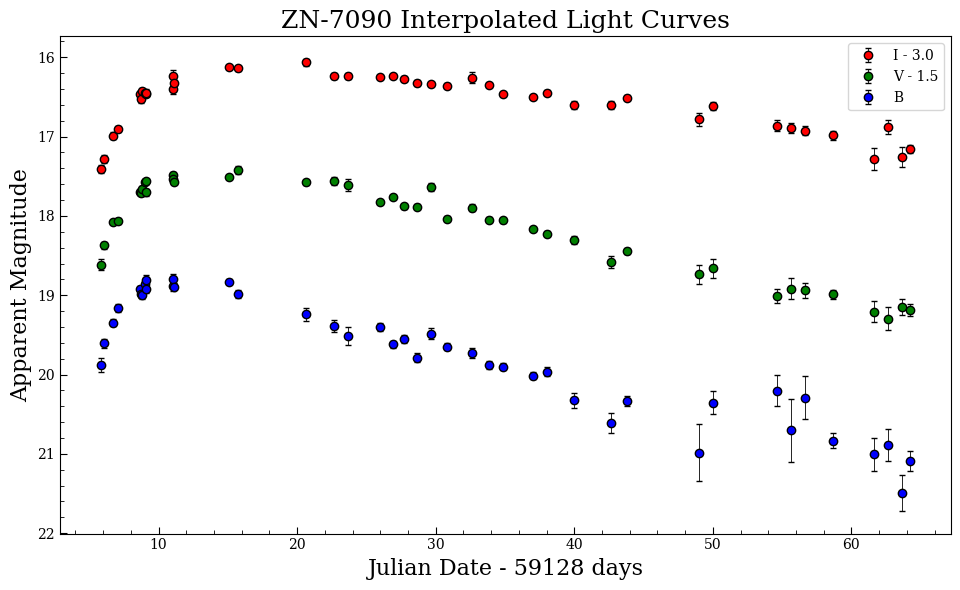

In [29]:
# Ensure all magnitudes in all bands are take in the same bands
fig, a0 = plt.subplots(figsize=(gr*scale,scale),ncols=1)
a0.errorbar(B_dates_R,I_mags_C - 3,yerr=new_I_err2,fmt='ro',elinewidth=0.6,capsize=2,ecolor='k',label="I - 3.0",mec='k')
a0.errorbar(B_dates_R,V_mags_C-1.5,yerr=V_mags_err_R,fmt='go',elinewidth=0.6,capsize=2,ecolor='k',label="V - 1.5",mec='k')
a0.errorbar(B_dates_R,B_mags_R,yerr=B_mags_err_R,fmt='bo',elinewidth=0.6,capsize=2,ecolor='k',label="B",mec='k')
a0.legend()
a0.yaxis.set_minor_locator(MultipleLocator(0.2))
a0.xaxis.set_minor_locator(MultipleLocator(2))
a0.set_xlabel(f"Julian Date - {int(dates[0])} days",fontsize=16)
a0.set_ylabel("Apparent Magnitude",fontsize=16)
a0.set_title("ZN-7090 Interpolated Light Curves",fontsize=18)
a0.invert_yaxis()
plt.tight_layout()
plt.show()

### Now with the interpolated light curves we can star applying Laymann's bolometric corrections

Because there are many bolometric corrections that need to be applied we will generate a master function that will apply the bolometric correction for a $2^{nd}$ order polynomial for a specied range of colors. This was I can pipeline the corrections in a more efficient manner. My main idea is to create function that takes two arrays of magnitudes in different bands, the coefficients of the correction and the effective range of the correction and  returns the bolometric magntiudes for that specific range of colors.

In [30]:
Layman_df

,Phase,Color,Type,Range,C0,C1,C2,RMS
0,Cooling,B - V,BC,"[-0.2, 0.5]",-0.393,0.786,-2.124,0.089
1,Cooling,B - I,BC,"[-0.2, 0.8]",-0.473,0.830,-1.064,0.072
2,Cooling,V - I,BC,"[0, 0.4]",-0.610,2.244,-2.107,0.146
3,Recomb,B - V,BC,"[0, 1.6]",-0.138,-0.013,-0.649,0.094
4,Recomb,B - I,BC,"[0, 2.8]",0.004,-0.297,-0.149,0.026
5,Recomb,V - I,BC,"[0, 1.2]",0.057,0.708,0.912,0.043
6,Recomb,B - V,pBC,"[0, 1.6]",0.058,-0.331,-0.520,0.092
7,Recomb,B - I,pBC,"[0, 2.8]",0.121,-0.387,-0.131,0.028
8,Recomb,V - I,pBC,"[0, 1.2]",0.065,0.744,-0.953,0.053


<h2 align="center"> Cooling Bolometric Corrections <h2>

In [31]:
from Bolometric_Corrections import Layman2
# Apply first bolometric correction for first row
mbol,mbol_Uerr,mbol_Lerr,color,color_err,\
correction,corr_Uerr,corr_Lerr,eff_dates = Layman2(B_mags_R,V_mags_C,B_mags_err_R,V_mags_err_R,\
                                        Layman_df.loc[0]['Range'],Layman_df.loc[0]['C0'],\
                                        Layman_df.loc[0]['C1'],Layman_df.loc[0]['C2'],\
                                        Layman_df.loc[0]['RMS'],B_dates_R)


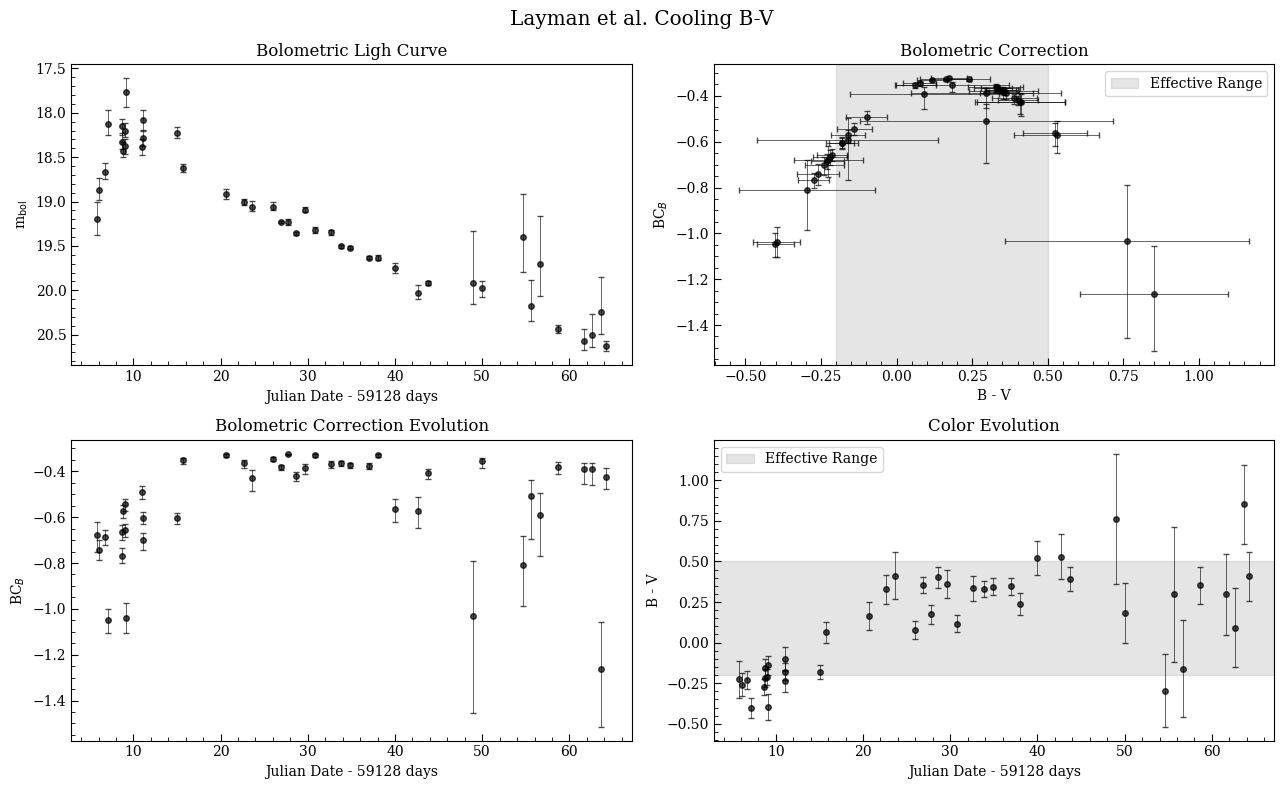

In [32]:
# Set up asymetric errorbars for correction
corr_aerr = np.array([corr_Lerr,corr_Uerr])/2
ambol_err = [mbol_Lerr,mbol_Uerr]

# Now we can look at distinct plots for this correction
fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(gr*8,8),
                                nrows=2,ncols=2)
fig.suptitle("Layman et al. Cooling B-V", fontsize='x-large')
a0.set_title("Bolometric Ligh Curve")
a0.errorbar(eff_dates,mbol,yerr=ambol_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a0.invert_yaxis()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days")
a0.set_ylabel(r"m$_{\mathrm{bol}}$")
a0.tick_params(axis='both', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(color,correction,xerr=color_err,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a1.axvspan(-0.2, 0.5 , alpha=0.2, color='gray',label="Effective Range")
a1.set_xlabel("B - V")
a1.set_ylabel(r"BC$_B$")
a1.set_title("Bolometric Correction")
a1.legend()
a1.yaxis.set_minor_locator(MultipleLocator(.05))
a1.xaxis.set_minor_locator(MultipleLocator(.05))

a2.errorbar(B_dates_R,correction,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a2.xaxis.set_minor_locator(MultipleLocator(2))
a2.set_xlabel(f"Julian Date - {int(dates[0])} days")
a2.set_ylabel(r"BC$_B$")
a2.set_title("Bolometric Correction Evolution")
a2.yaxis.set_minor_locator(MultipleLocator(.05))
a2.xaxis.set_minor_locator(MultipleLocator(2))

a3.errorbar(B_dates_R,color,yerr=color_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a3.axhspan(-0.2, 0.5 , alpha=0.2, color='gray',label="Effective Range")
a3.xaxis.set_minor_locator(MultipleLocator(2))
a3.set_xlabel(f"Julian Date - {int(dates[0])} days")
a3.set_ylabel("B - V")
a3.set_title("Color Evolution")
a3.legend()
a3.yaxis.set_minor_locator(MultipleLocator(.05))
a3.xaxis.set_minor_locator(MultipleLocator(2))

plt.tight_layout()
plt.show()

Its highly concerning to see that the uncertainty in the bolometric correction evolution plot does not translate properly to the uncertaity in the bolometric light curve plot. We see that the data points with indices -6 and -8 have errorbars of around 2 orders of magnitude we must investigate this occurance.

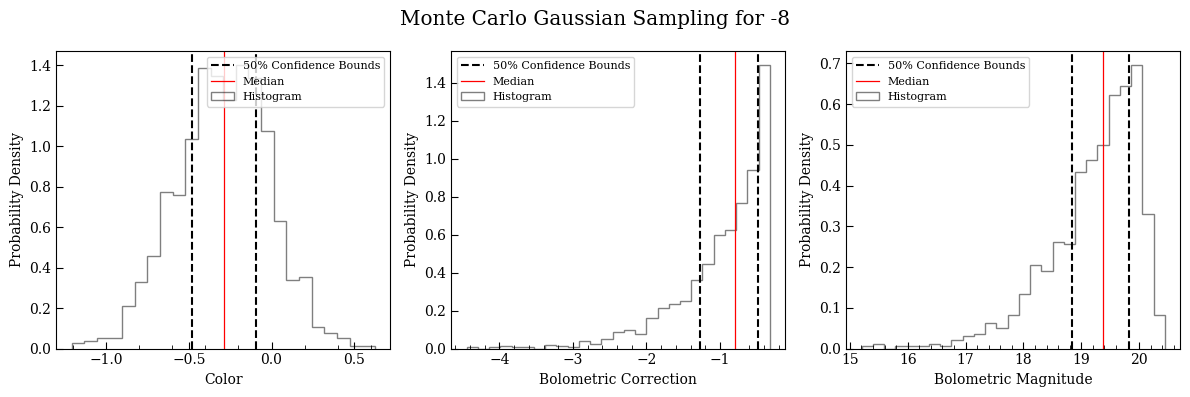

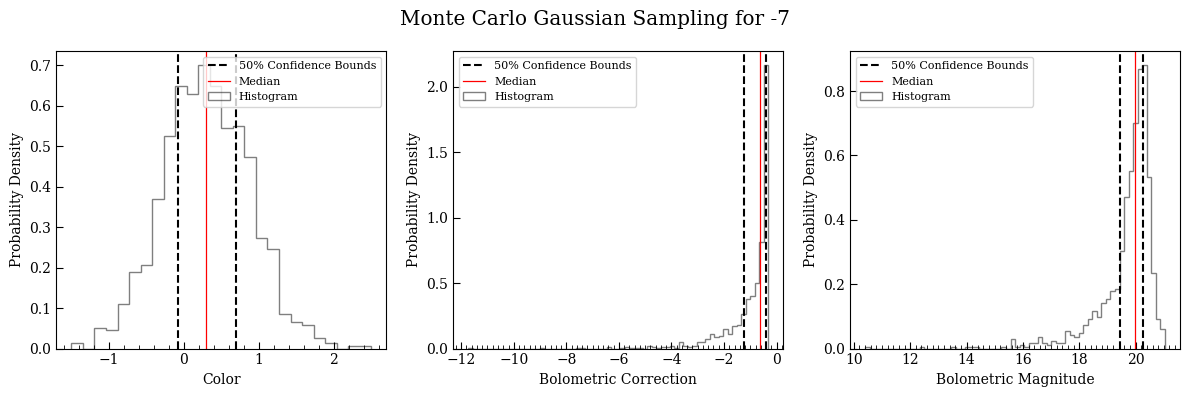

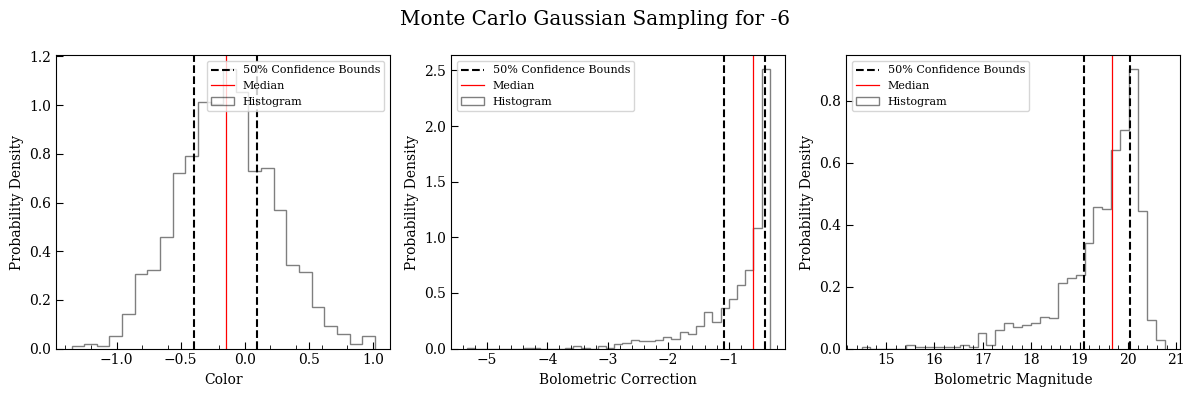

In [33]:
# Set up correction
c0, c1, c2  = Layman_df.loc[0]["C0"], Layman_df.loc[0]["C1"], Layman_df.loc[0]["C2"]
BC = lambda x: c0 + c1*x + c2*x**2

for i in range(-8,-5):
    fig = plt.figure(figsize=(12,4))
    fig.suptitle(f"Monte Carlo Gaussian Sampling for {i}", fontsize='x-large')
    a1 = plt.subplot(1,3,1)
    a2 = plt.subplot(1,3,2)
    a3 = plt.subplot(1,3,3)
    
    s_mag1 = np.random.normal(loc=B_mags_R[i],scale=B_mags_err_R[i],size=1000)
    s_mag2 = np.random.normal(loc=V_mags_C[i],scale=B_mags_err_R[i],size=1000)
        
    s_color = s_mag1-s_mag2
    color_med = np.median(s_color)
    color_lq = np.percentile(s_color,25)
    color_uq = np.percentile(s_color,75)
        
    s_BC = BC(s_color)
    BC_med = np.median(s_BC)
    BC_uq = np.percentile(s_BC,75)
    BC_lq = np.percentile(s_BC,25)
        
    s_mbol = s_BC + s_mag1
    mbol_med = (np.median(s_mbol))
    mbol_uq = np.percentile(s_mbol,75)
    mbol_lq = np.percentile(s_mbol,25)

    a1.hist(s_color, bins = 'fd',density=True, color = 'k', histtype = 'step', label = 'Histogram', alpha = 0.5)
    a1.axvline(x = color_lq, color = 'k', label = '50% Confidence Bounds', linestyle = '--')
    a1.axvline(x = color_uq, color = 'k', linestyle = '--')
    a1.axvline(x = color_med, color = 'r', label = 'Median', linestyle = '-',linewidth=0.9)
    a1.set_xlabel("Color")
    a1.set_ylabel("Probability Density")
    a1.legend(prop={'size':8})
    a1.xaxis.set_minor_locator(MultipleLocator(0.2))
    
    a2.hist(s_BC,bins = 'fd',density=True, color = 'k', histtype = 'step', label = 'Histogram', alpha = 0.5)
    a2.axvline(x = BC_lq, color = 'k', label = '50% Confidence Bounds', linestyle = '--')
    a2.axvline(x = BC_uq, color = 'k', linestyle = '--')
    a2.axvline(x = BC_med, color = 'r', label = 'Median', linestyle = '-',linewidth=0.9)
    a2.set_xlabel("Bolometric Correction")
    a2.set_ylabel("Probability Density")
    a2.legend(prop={'size':8})
    a2.xaxis.set_minor_locator(MultipleLocator(0.2))
    
    a3.hist(s_mbol,bins = 'fd',density=True, color = 'k', histtype = 'step', label = 'Histogram', alpha = 0.5)
    a3.axvline(x = mbol_lq, color = 'k', label = '50% Confidence Bounds', linestyle = '--')
    a3.axvline(x = mbol_uq, color = 'k', linestyle = '--')
    a3.axvline(x = mbol_med, color = 'r', label = 'Median', linestyle = '-',linewidth=0.9)
    a3.set_xlabel("Bolometric Magnitude")
    a3.set_ylabel("Probability Density")
    a3.legend(prop={'size':8})
    a3.xaxis.set_minor_locator(MultipleLocator(0.2))
    
    plt.tight_layout()
    plt.show()
    

In [34]:
# Apply B-I correction
mbol,mbol_Uerr,mbol_Lerr,color,color_err,\
correction,corr_Uerr,corr_Lerr,eff_dates = Layman2(B_mags_R,I_mags_C,B_mags_err_R,new_I_err2,\
                                        Layman_df.loc[1]['Range'],Layman_df.loc[1]['C0'],\
                                        Layman_df.loc[1]['C1'],Layman_df.loc[1]['C2'],\
                                        Layman_df.loc[1]['RMS'],B_dates_R)

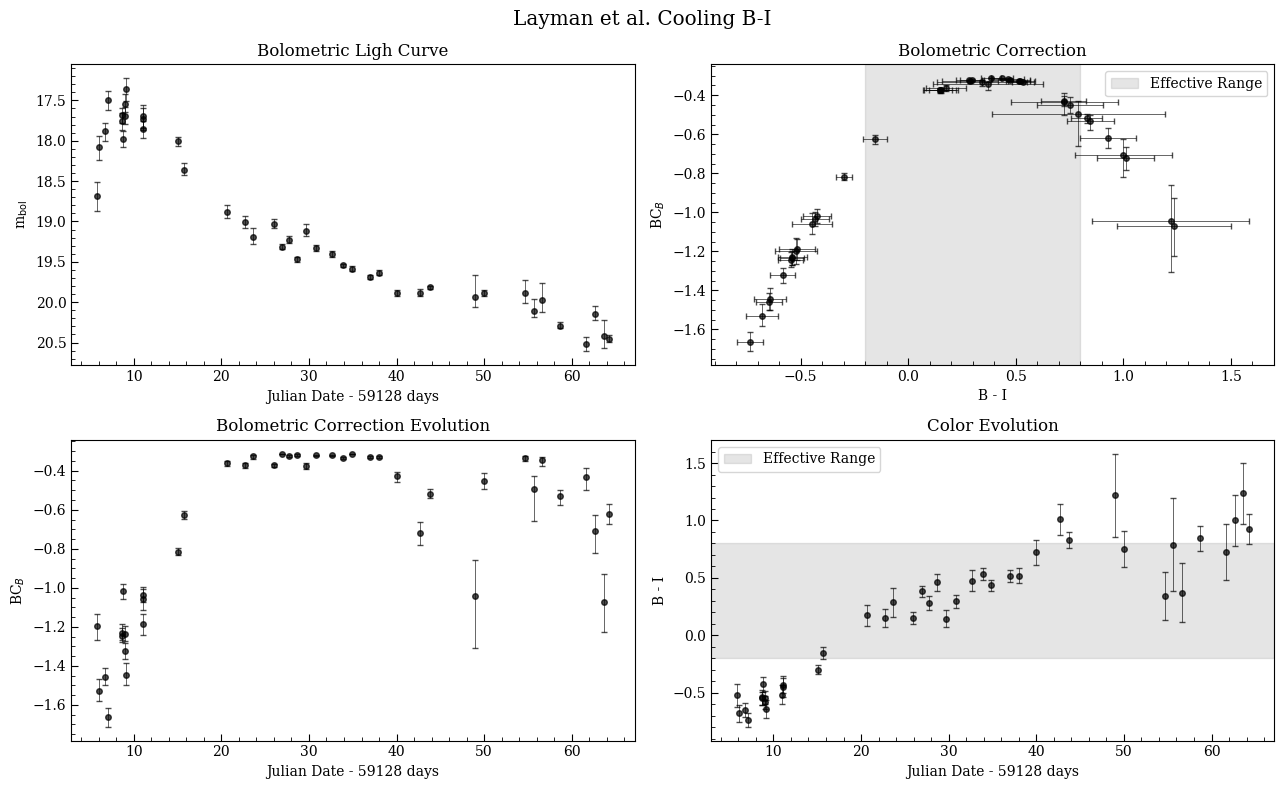

In [35]:
# Set up asymetric errorbars for correction and mag
corr_aerr = np.array([corr_Lerr,corr_Uerr])/2
ambol_err = [mbol_Lerr,mbol_Uerr]

# Now we can look at distinct plots for this correction
fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(gr*8,8),
                                nrows=2,ncols=2)
fig.suptitle("Layman et al. Cooling B-I", fontsize='x-large')
a0.set_title("Bolometric Ligh Curve")
a0.errorbar(eff_dates,mbol,yerr=ambol_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a0.invert_yaxis()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days")
a0.set_ylabel(r"m$_{\mathrm{bol}}$")
a0.tick_params(axis='both', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(color,correction,xerr=color_err,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a1.axvspan(Layman_df.loc[1]['Range'][0], Layman_df.loc[1]['Range'][1] , alpha=0.2, color='gray',label="Effective Range")
a1.set_xlabel("B - I")
a1.set_ylabel(r"BC$_B$")
a1.set_title("Bolometric Correction")
a1.legend()
a1.yaxis.set_minor_locator(MultipleLocator(.05))
a1.xaxis.set_minor_locator(MultipleLocator(0.1))

a2.errorbar(B_dates_R,correction,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a2.set_xlabel(f"Julian Date - {int(dates[0])} days")
a2.set_ylabel(r"BC$_B$")
a2.set_title("Bolometric Correction Evolution")
a2.yaxis.set_minor_locator(MultipleLocator(.05))
a2.xaxis.set_minor_locator(MultipleLocator(2))

a3.errorbar(B_dates_R,color,yerr=color_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a3.axhspan(-0.2, 0.8 , alpha=0.2, color='gray',label="Effective Range")
a3.set_xlabel(f"Julian Date - {int(dates[0])} days")
a3.set_ylabel("B - I")
a3.set_title("Color Evolution")
a3.legend()
a3.yaxis.set_minor_locator(MultipleLocator(.1))
a3.xaxis.set_minor_locator(MultipleLocator(2))


plt.tight_layout()
plt.show()

In [36]:
# Apply V-I correction
mbol,mbol_Uerr,mbol_Lerr,color,color_err,\
correction,corr_Uerr,corr_Lerr,eff_dates = Layman2(V_mags_C,I_mags_C,V_mags_err_R,new_I_err2,\
                                        Layman_df.loc[2]['Range'],Layman_df.loc[2]['C0'],\
                                        Layman_df.loc[2]['C1'],Layman_df.loc[2]['C2'],\
                                        Layman_df.loc[2]['RMS'],B_dates_R)

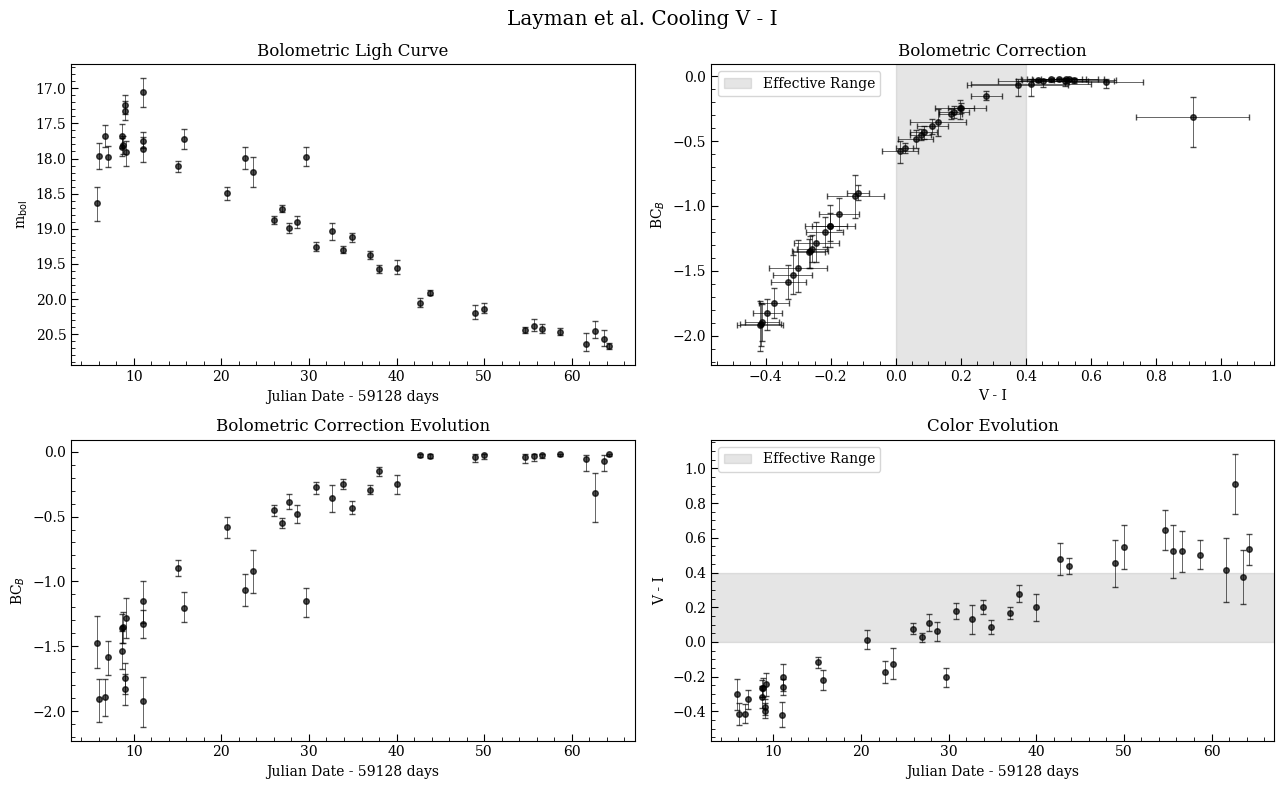

In [37]:
# Set up asymetric errorbars for correction and mag
corr_aerr = [corr_Lerr,corr_Uerr]
ambol_err = [mbol_Lerr,mbol_Uerr]

# Now we can look at distinct plots for this correction
fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(gr*8,8),
                                nrows=2,ncols=2)
fig.suptitle("Layman et al. Cooling V - I", fontsize='x-large')
a0.set_title("Bolometric Ligh Curve")
a0.errorbar(eff_dates,mbol,yerr=ambol_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a0.invert_yaxis()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days")
a0.set_ylabel(r"m$_{\mathrm{bol}}$")
a0.tick_params(axis='both', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(color,correction,xerr=color_err,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a1.axvspan(Layman_df.loc[2]['Range'][0], Layman_df.loc[2]['Range'][1] , alpha=0.2, color='gray',label="Effective Range")
a1.set_xlabel("V - I")
a1.set_ylabel(r"BC$_B$")
a1.set_title("Bolometric Correction")
a1.legend()
a1.yaxis.set_minor_locator(MultipleLocator(.1))
a1.xaxis.set_minor_locator(MultipleLocator(0.05))

a2.errorbar(B_dates_R,correction,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a2.set_xlabel(f"Julian Date - {int(dates[0])} days")
a2.set_ylabel(r"BC$_B$")
a2.set_title("Bolometric Correction Evolution")
a2.yaxis.set_minor_locator(MultipleLocator(.1))
a2.xaxis.set_minor_locator(MultipleLocator(2))

a3.errorbar(B_dates_R,color,yerr=color_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a3.axhspan(Layman_df.loc[2]['Range'][0], Layman_df.loc[2]['Range'][1], alpha=0.2, color='gray',label="Effective Range")
a3.set_xlabel(f"Julian Date - {int(dates[0])} days")
a3.set_ylabel("V - I")
a3.set_title("Color Evolution")
a3.legend()
a3.yaxis.set_minor_locator(MultipleLocator(.05))
a3.xaxis.set_minor_locator(MultipleLocator(2))

plt.tight_layout()
plt.show()

<h2 align="center"> Radiatevely/ Recombination Powered Bolometric Corrections <h2>

In [38]:
Layman_df

,Phase,Color,Type,Range,C0,C1,C2,RMS
0,Cooling,B - V,BC,"[-0.2, 0.5]",-0.393,0.786,-2.124,0.089
1,Cooling,B - I,BC,"[-0.2, 0.8]",-0.473,0.830,-1.064,0.072
2,Cooling,V - I,BC,"[0, 0.4]",-0.610,2.244,-2.107,0.146
3,Recomb,B - V,BC,"[0, 1.6]",-0.138,-0.013,-0.649,0.094
4,Recomb,B - I,BC,"[0, 2.8]",0.004,-0.297,-0.149,0.026
5,Recomb,V - I,BC,"[0, 1.2]",0.057,0.708,0.912,0.043
6,Recomb,B - V,pBC,"[0, 1.6]",0.058,-0.331,-0.520,0.092
7,Recomb,B - I,pBC,"[0, 2.8]",0.121,-0.387,-0.131,0.028
8,Recomb,V - I,pBC,"[0, 1.2]",0.065,0.744,-0.953,0.053


In [39]:
# Apply B-V correction for recombination phase
mbol,mbol_Uerr,mbol_Lerr,color,color_err,\
correction,corr_Uerr,corr_Lerr,eff_dates = Layman2(B_mags_R,V_mags_C,B_mags_err_R,V_mags_err_R,\
                                        Layman_df.loc[3]['Range'],Layman_df.loc[3]['C0'],\
                                        Layman_df.loc[3]['C1'],Layman_df.loc[3]['C2'],\
                                        Layman_df.loc[3]['RMS'],B_dates_R)

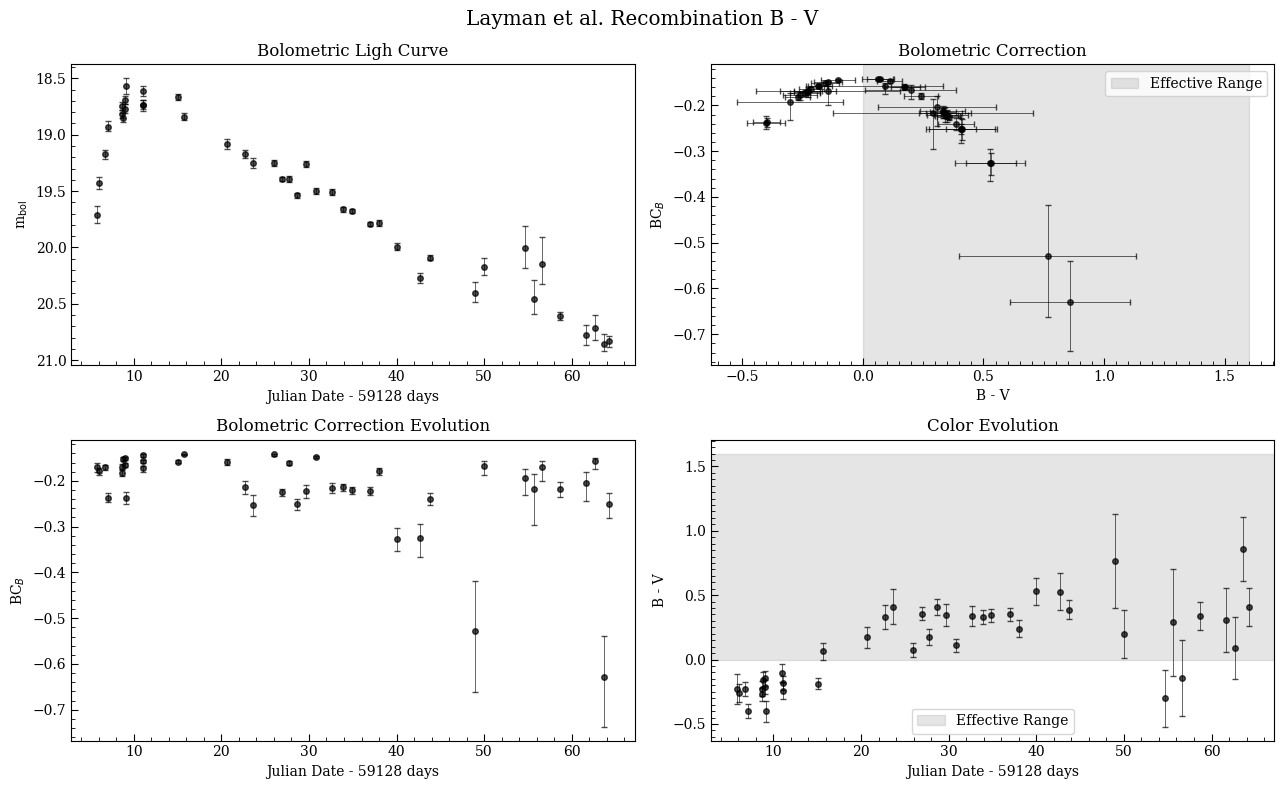

In [40]:
# Set up asymetric errorbars for correction and mag
corr_aerr = np.array([corr_Lerr,corr_Uerr])/2
ambol_err = [mbol_Lerr,mbol_Uerr]

# Now we can look at distinct plots for this correction
fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(gr*8,8),
                                nrows=2,ncols=2)
fig.suptitle("Layman et al. Recombination B - V", fontsize='x-large')
a0.set_title("Bolometric Ligh Curve")
a0.errorbar(eff_dates,mbol,yerr=ambol_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a0.invert_yaxis()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days")
a0.set_ylabel(r"m$_{\mathrm{bol}}$")
a0.tick_params(axis='both', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(color,correction,xerr=color_err,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a1.axvspan(Layman_df.loc[3]['Range'][0], Layman_df.loc[3]['Range'][1], alpha=0.2, color='gray',label="Effective Range")
a1.set_xlabel("B - V")
a1.set_ylabel(r"BC$_B$")
a1.set_title("Bolometric Correction")
a1.legend()
a1.yaxis.set_minor_locator(MultipleLocator(.02))
a1.xaxis.set_minor_locator(MultipleLocator(0.05))

a2.errorbar(B_dates_R,correction,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a2.set_xlabel(f"Julian Date - {int(dates[0])} days")
a2.set_ylabel(r"BC$_B$")
a2.set_title("Bolometric Correction Evolution")
a2.yaxis.set_minor_locator(MultipleLocator(.02))
a2.xaxis.set_minor_locator(MultipleLocator(2))

a3.errorbar(B_dates_R,color,yerr=color_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a3.axhspan(Layman_df.loc[3]['Range'][0], Layman_df.loc[3]['Range'][1] , alpha=0.2, color='gray',label="Effective Range")
a3.set_xlabel(f"Julian Date - {int(dates[0])} days")
a3.set_ylabel("B - V")
a3.set_title("Color Evolution")
a3.legend()
a3.yaxis.set_minor_locator(MultipleLocator(.05))
a3.xaxis.set_minor_locator(MultipleLocator(2))

plt.tight_layout()
plt.show()

In [41]:
print(corr_aerr[0][-10])
print(ambol_err[0][-10])

0.1330631293482587
0.1000010556505515


In [42]:
# Apply B-I correction for recombination phase
mbol,mbol_Uerr,mbol_Lerr,color,color_err,\
correction,corr_Uerr,corr_Lerr,eff_dates = Layman2(B_mags_R,I_mags_C,B_mags_err_R,new_I_err2,\
                                        Layman_df.loc[4]['Range'],Layman_df.loc[4]['C0'],\
                                        Layman_df.loc[4]['C1'],Layman_df.loc[4]['C2'],\
                                        Layman_df.loc[4]['RMS'],B_dates_R)

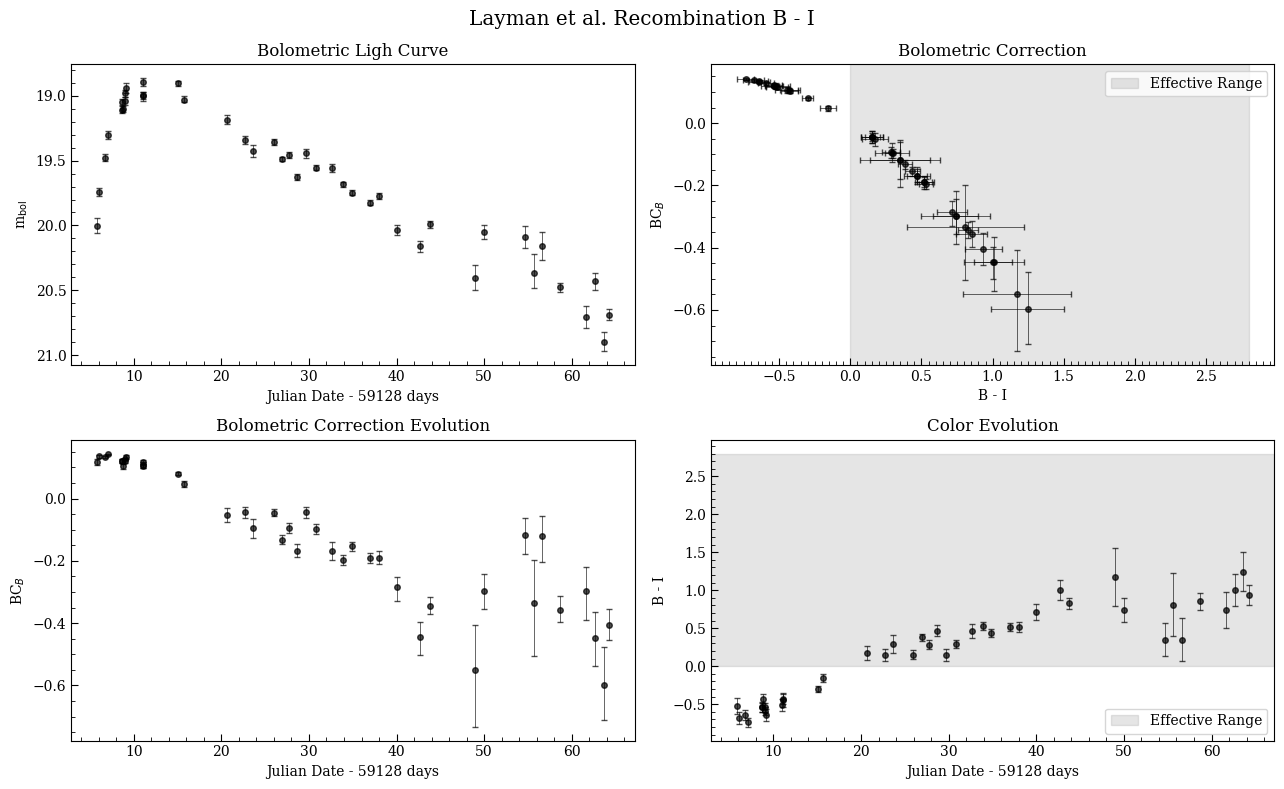

In [43]:
# Set up asymetric errorbars for correction and mag
corr_aerr = [corr_Lerr,corr_Uerr]
ambol_err = [mbol_Lerr,mbol_Uerr]

# Now we can look at distinct plots for this correction
fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(gr*8,8),
                                nrows=2,ncols=2)
fig.suptitle("Layman et al. Recombination B - I", fontsize='x-large')
a0.set_title("Bolometric Ligh Curve")
a0.errorbar(eff_dates,mbol,yerr=ambol_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a0.invert_yaxis()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days")
a0.set_ylabel(r"m$_{\mathrm{bol}}$")
a0.tick_params(axis='both', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(color,correction,xerr=color_err,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a1.axvspan(Layman_df.loc[4]['Range'][0], Layman_df.loc[4]['Range'][1], alpha=0.2, color='gray',label="Effective Range")
a1.set_xlabel("B - I")
a1.set_ylabel(r"BC$_B$")
a1.set_title("Bolometric Correction")
a1.legend()
a1.yaxis.set_minor_locator(MultipleLocator(.05))
a1.xaxis.set_minor_locator(MultipleLocator(0.05))

a2.errorbar(B_dates_R,correction,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a2.set_xlabel(f"Julian Date - {int(dates[0])} days")
a2.set_ylabel(r"BC$_B$")
a2.set_title("Bolometric Correction Evolution")
a2.yaxis.set_minor_locator(MultipleLocator(.05))
a2.xaxis.set_minor_locator(MultipleLocator(2))

a3.errorbar(B_dates_R,color,yerr=color_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a3.axhspan(Layman_df.loc[4]['Range'][0], Layman_df.loc[4]['Range'][1] , alpha=0.2, color='gray',label="Effective Range")
a3.set_xlabel(f"Julian Date - {int(dates[0])} days")
a3.set_ylabel("B - I")
a3.set_title("Color Evolution")
a3.legend()
a3.yaxis.set_minor_locator(MultipleLocator(.1))
a3.xaxis.set_minor_locator(MultipleLocator(2))

plt.tight_layout()
plt.show()

In [44]:
# Apply V-I correction for recombination phase
mbol,mbol_Uerr,mbol_Lerr,color,color_err,\
correction,corr_Uerr,corr_Lerr,eff_dates = Layman2(V_mags_C,I_mags_C,V_mags_err_R,new_I_err2,\
                                        Layman_df.loc[5]['Range'],Layman_df.loc[5]['C0'],\
                                        Layman_df.loc[5]['C1'],Layman_df.loc[5]['C2'],\
                                        Layman_df.loc[5]['RMS'],B_dates_R)

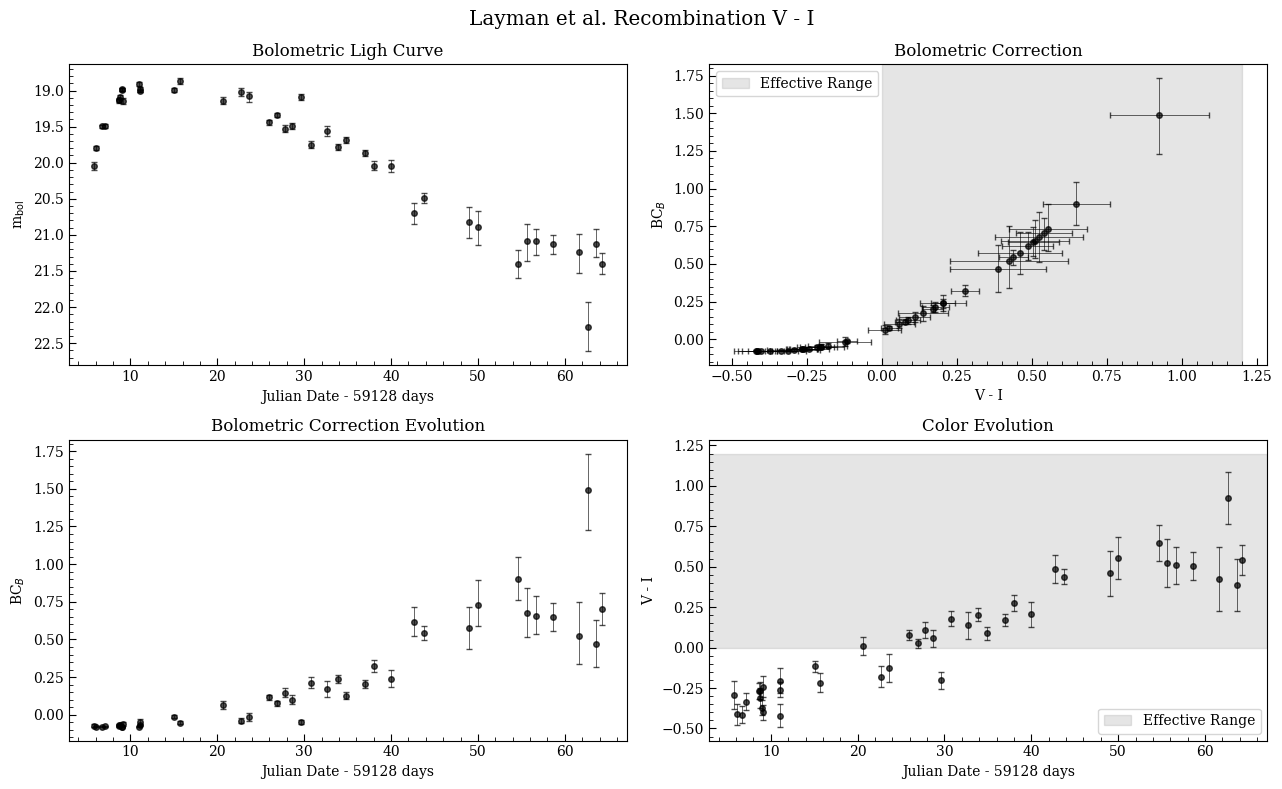

In [45]:
# Set up asymetric errorbars for correction and mag
corr_aerr = [corr_Lerr,corr_Uerr]
ambol_err = [mbol_Lerr,mbol_Uerr]

# Now we can look at distinct plots for this correction
fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(gr*8,8),
                                nrows=2,ncols=2)
fig.suptitle("Layman et al. Recombination V - I", fontsize='x-large')
a0.set_title("Bolometric Ligh Curve")
a0.errorbar(eff_dates,mbol,yerr=ambol_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a0.invert_yaxis()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days")
a0.set_ylabel(r"m$_{\mathrm{bol}}$")
a0.tick_params(axis='both', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(color,correction,xerr=color_err,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a1.axvspan(Layman_df.loc[5]['Range'][0], Layman_df.loc[5]['Range'][1], alpha=0.2, color='gray',label="Effective Range")
a1.set_xlabel("V - I")
a1.set_ylabel(r"BC$_B$")
a1.set_title("Bolometric Correction")
a1.legend()
a1.yaxis.set_minor_locator(MultipleLocator(.05))
a1.xaxis.set_minor_locator(MultipleLocator(0.05))

a2.errorbar(B_dates_R,correction,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a2.set_xlabel(f"Julian Date - {int(dates[0])} days")
a2.set_ylabel(r"BC$_B$")
a2.set_title("Bolometric Correction Evolution")
a2.yaxis.set_minor_locator(MultipleLocator(.05))
a2.xaxis.set_minor_locator(MultipleLocator(2))

a3.errorbar(B_dates_R,color,yerr=color_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a3.axhspan(Layman_df.loc[5]['Range'][0], Layman_df.loc[5]['Range'][1] , alpha=0.2, color='gray',label="Effective Range")
a3.set_xlabel(f"Julian Date - {int(dates[0])} days")
a3.set_ylabel("V - I")
a3.set_title("Color Evolution")
a3.legend()
a3.yaxis.set_minor_locator(MultipleLocator(.05))
a3.xaxis.set_minor_locator(MultipleLocator(2))

plt.tight_layout()
plt.show()

<h2 align="center"> Radiatevely/ Recombination Powered Pseudo Bolometric Corrections <h2>

In [46]:
# Apply B-V pseudo correction for recombination phase
mbol,mbol_Uerr,mbol_Lerr,color,color_err,\
correction,corr_Uerr,corr_Lerr,eff_dates = Layman2(B_mags_R,V_mags_C,B_mags_err_R,V_mags_err_R,\
                                        Layman_df.loc[6]['Range'],Layman_df.loc[6]['C0'],\
                                        Layman_df.loc[6]['C1'],Layman_df.loc[6]['C2'],\
                                        Layman_df.loc[6]['RMS'],B_dates_R)

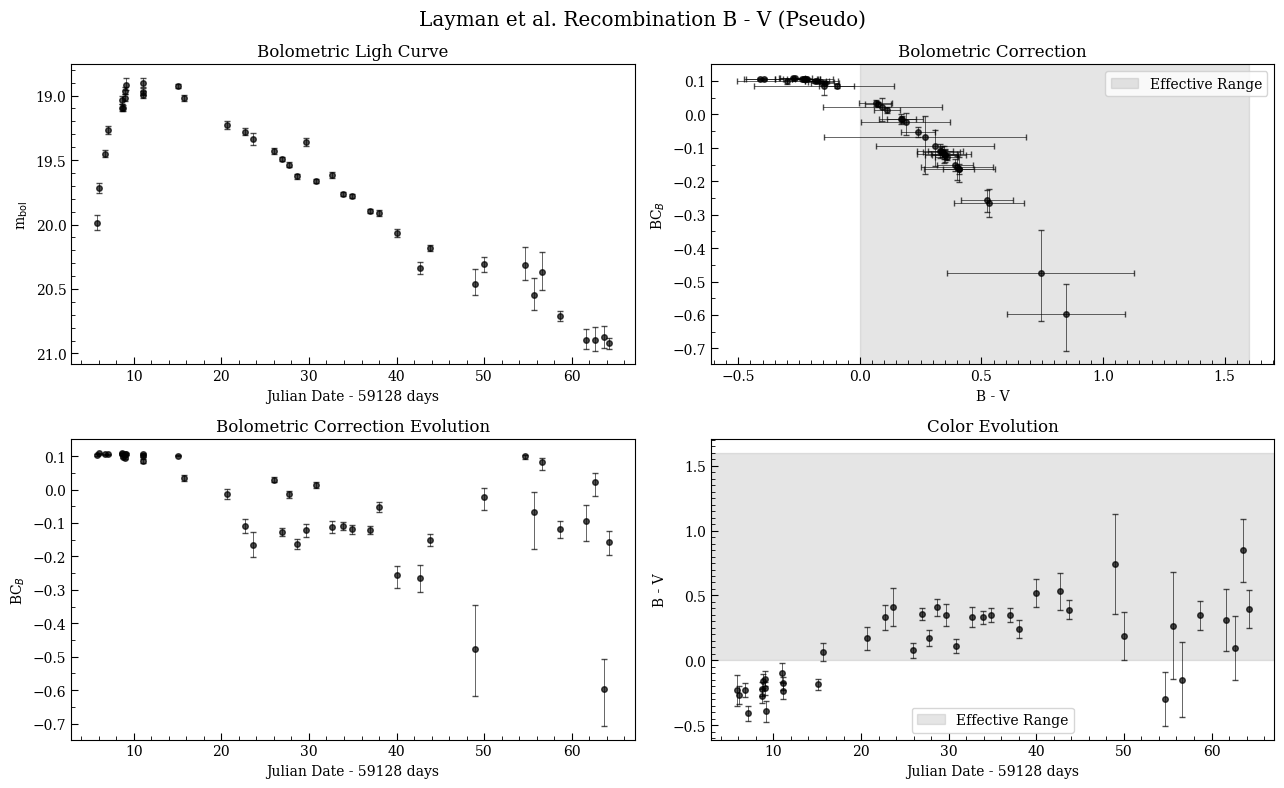

In [47]:
# Set up asymetric errorbars for correction and mag
corr_aerr = np.array([corr_Lerr,corr_Uerr])/2
ambol_err = [mbol_Lerr,mbol_Uerr]

# Now we can look at distinct plots for this correction
fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(gr*8,8),
                                nrows=2,ncols=2)
fig.suptitle("Layman et al. Recombination B - V (Pseudo)", fontsize='x-large')
a0.set_title("Bolometric Ligh Curve")
a0.errorbar(eff_dates,mbol,yerr=ambol_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a0.invert_yaxis()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days")
a0.set_ylabel(r"m$_{\mathrm{bol}}$")
a0.tick_params(axis='both', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(color,correction,xerr=color_err,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a1.axvspan(Layman_df.loc[6]['Range'][0], Layman_df.loc[6]['Range'][1], alpha=0.2, color='gray',label="Effective Range")
a1.set_xlabel("B - V")
a1.set_ylabel(r"BC$_B$")
a1.set_title("Bolometric Correction")
a1.legend()
a1.yaxis.set_minor_locator(MultipleLocator(.05))
a1.xaxis.set_minor_locator(MultipleLocator(0.05))

a2.errorbar(B_dates_R,correction,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a2.set_xlabel(f"Julian Date - {int(dates[0])} days")
a2.set_ylabel(r"BC$_B$")
a2.set_title("Bolometric Correction Evolution")
a2.yaxis.set_minor_locator(MultipleLocator(.05))
a2.xaxis.set_minor_locator(MultipleLocator(2))

a3.errorbar(B_dates_R,color,yerr=color_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a3.axhspan(Layman_df.loc[6]['Range'][0], Layman_df.loc[6]['Range'][1] , alpha=0.2, color='gray',label="Effective Range")
a3.set_xlabel(f"Julian Date - {int(dates[0])} days")
a3.set_ylabel("B - V")
a3.set_title("Color Evolution")
a3.legend()
a3.yaxis.set_minor_locator(MultipleLocator(.05))
a3.xaxis.set_minor_locator(MultipleLocator(2))

plt.tight_layout()
plt.show()

In [48]:
# Apply B-I pseudo correction for recombination phase
mbol,mbol_Uerr,mbol_Lerr,color,color_err,\
correction,corr_Uerr,corr_Lerr,eff_dates = Layman2(B_mags_R,I_mags_C,B_mags_err_R,new_I_err2,\
                                        Layman_df.loc[7]['Range'],Layman_df.loc[7]['C0'],\
                                        Layman_df.loc[7]['C1'],Layman_df.loc[7]['C2'],\
                                        Layman_df.loc[7]['RMS'],B_dates_R)

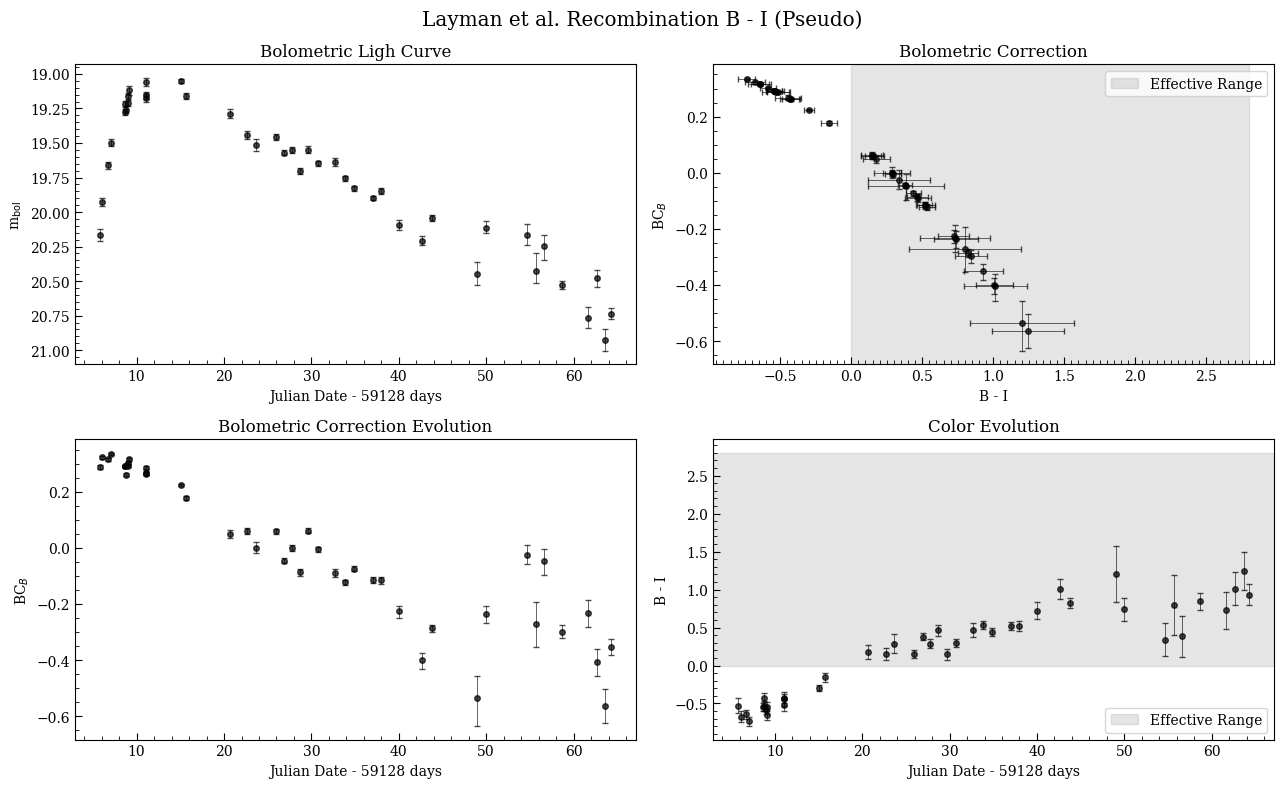

In [49]:
# Set up asymetric errorbars for correction and mag
corr_aerr = np.array([corr_Lerr,corr_Uerr])/2
ambol_err = [mbol_Lerr,mbol_Uerr]

# Now we can look at distinct plots for this correction
fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(gr*8,8),
                                nrows=2,ncols=2)
fig.suptitle("Layman et al. Recombination B - I (Pseudo)", fontsize='x-large')
a0.set_title("Bolometric Ligh Curve")
a0.errorbar(eff_dates,mbol,yerr=ambol_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a0.invert_yaxis()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days")
a0.set_ylabel(r"m$_{\mathrm{bol}}$")
a0.tick_params(axis='both', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.05))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(color,correction,xerr=color_err,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a1.axvspan(Layman_df.loc[7]['Range'][0], Layman_df.loc[7]['Range'][1], alpha=0.2, color='gray',label="Effective Range")
a1.set_xlabel("B - I")
a1.set_ylabel(r"BC$_B$")
a1.set_title("Bolometric Correction")
a1.legend()
a1.yaxis.set_minor_locator(MultipleLocator(.05))
a1.xaxis.set_minor_locator(MultipleLocator(0.05))

a2.errorbar(B_dates_R,correction,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a2.set_xlabel(f"Julian Date - {int(dates[0])} days")
a2.set_ylabel(r"BC$_B$")
a2.set_title("Bolometric Correction Evolution")
a2.yaxis.set_minor_locator(MultipleLocator(.05))
a2.xaxis.set_minor_locator(MultipleLocator(2))

a3.errorbar(B_dates_R,color,yerr=color_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a3.axhspan(Layman_df.loc[7]['Range'][0], Layman_df.loc[7]['Range'][1] , alpha=0.2, color='gray',label="Effective Range")
a3.set_xlabel(f"Julian Date - {int(dates[0])} days")
a3.set_ylabel("B - I")
a3.set_title("Color Evolution")
a3.legend()
a3.yaxis.set_minor_locator(MultipleLocator(.1))
a3.xaxis.set_minor_locator(MultipleLocator(2))

plt.tight_layout()
plt.show()

In [50]:
# Apply V-I pseudo correction for recombination phase
mbol,mbol_Uerr,mbol_Lerr,color,color_err,\
correction,corr_Uerr,corr_Lerr,eff_dates = Layman2(V_mags_C,I_mags_C,V_mags_err_R,new_I_err2,\
                                        Layman_df.loc[8]['Range'],Layman_df.loc[8]['C0'],\
                                        Layman_df.loc[8]['C1'],Layman_df.loc[8]['C2'],\
                                        Layman_df.loc[8]['RMS'],B_dates_R)

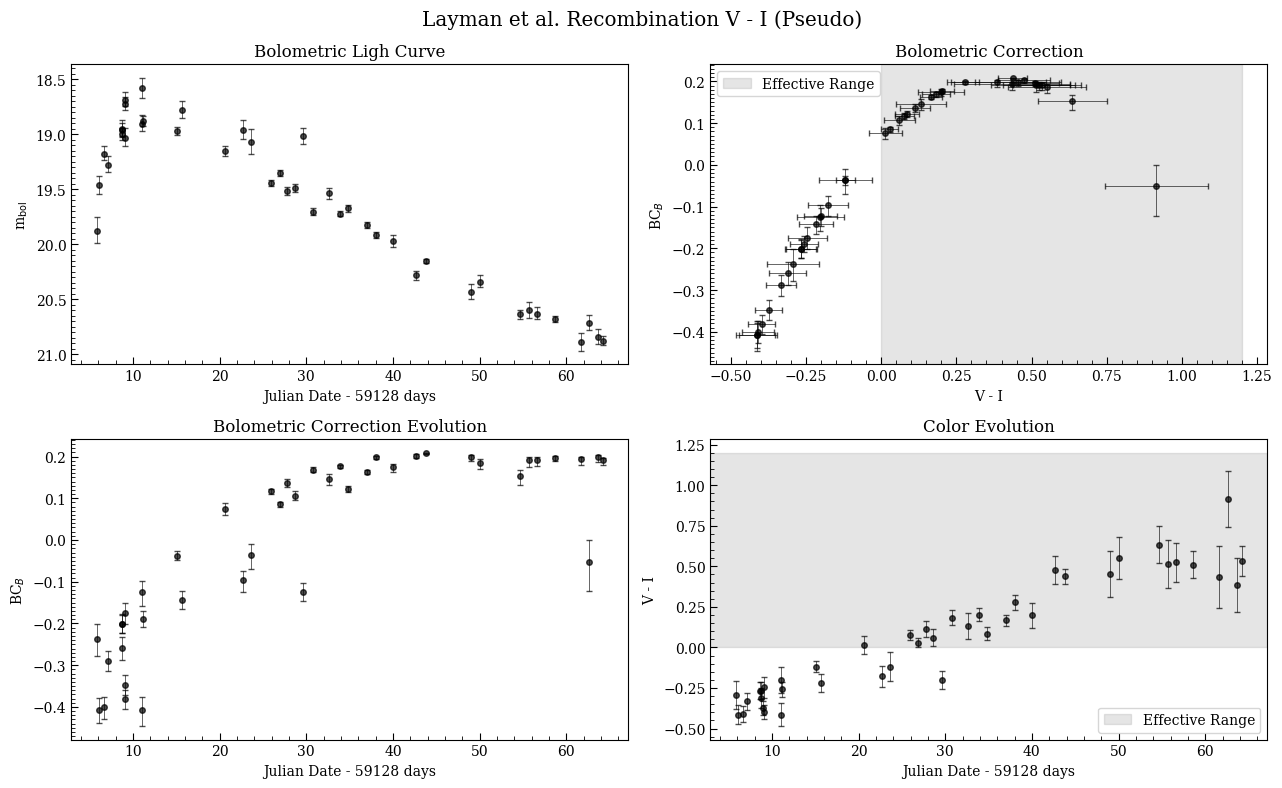

In [51]:
# Set up asymetric errorbars for correction and mag
corr_aerr = np.array([corr_Lerr,corr_Uerr])/2
ambol_err = [mbol_Lerr,mbol_Uerr]

# Now we can look at distinct plots for this correction
fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(gr*8,8),
                                nrows=2,ncols=2)
fig.suptitle("Layman et al. Recombination V - I (Pseudo)", fontsize='x-large')
a0.set_title("Bolometric Ligh Curve")
a0.errorbar(eff_dates,mbol,yerr=ambol_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a0.invert_yaxis()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days")
a0.set_ylabel(r"m$_{\mathrm{bol}}$")
a0.tick_params(axis='both', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.05))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(color,correction,xerr=color_err,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a1.axvspan(Layman_df.loc[8]['Range'][0], Layman_df.loc[8]['Range'][1], alpha=0.2, color='gray',label="Effective Range")
a1.set_xlabel("V - I")
a1.set_ylabel(r"BC$_B$")
a1.set_title("Bolometric Correction")
a1.legend()
a1.yaxis.set_minor_locator(MultipleLocator(.01))
a1.xaxis.set_minor_locator(MultipleLocator(0.05))

a2.errorbar(B_dates_R,correction,yerr=corr_aerr,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a2.set_xlabel(f"Julian Date - {int(dates[0])} days")
a2.set_ylabel(r"BC$_B$")
a2.set_title("Bolometric Correction Evolution")
a2.yaxis.set_minor_locator(MultipleLocator(.01))
a2.xaxis.set_minor_locator(MultipleLocator(2))

a3.errorbar(B_dates_R,color,yerr=color_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.7,ms=4)
a3.axhspan(Layman_df.loc[8]['Range'][0], Layman_df.loc[8]['Range'][1] , alpha=0.2, color='gray',label="Effective Range")
a3.set_xlabel(f"Julian Date - {int(dates[0])} days")
a3.set_ylabel("V - I")
a3.set_title("Color Evolution")
a3.legend()
a3.yaxis.set_minor_locator(MultipleLocator(.05))
a3.xaxis.set_minor_locator(MultipleLocator(2))

plt.tight_layout()
plt.show()

We see that the recombination/radiatevely bolometric corrections display the light curves that are characteristic to a SNe Type II-L, however, in order to apply this correction we need to have some degree of certainty that the rise of the light curve is due to the radioactive decay of $^{56}$Ni and $^{56}$Co. The best way to classify if a SNe rise mechanism is either shock cooling emission or radioactive decay it to check its rise time from first light to peak.

<h2 align="center"> Layman et al. $\href{https://ui.adsabs.harvard.edu/abs/2014MNRAS.437.3848L/abstract}{2016}$ rise time contraints. <h2>

In this paper they study a sample 39 of SE SNe, of which 9 are Type IIb. From this study they calculated the physical parameters of the SNe and the average rise time for this sample of SNe is 17.6 days.